<a href="https://colab.research.google.com/github/ViniTelheiro/GANs/blob/main/pytorch_dcgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Generator(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.conv1 = nn.Sequential(
        nn.ConvTranspose2d(100, 256, 4, stride=2, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU()
    )
    self.conv2 = nn.Sequential(
        nn.ConvTranspose2d(256, 128, 3, stride=2,padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU()
    )
    
    self.conv3 = nn.Sequential(
        nn.ConvTranspose2d(128, 64, 4, stride=2,padding=1, bias=False),
        nn.BatchNorm2d(64),
        nn.LeakyReLU()
    )

    self.conv4 = nn.Sequential(
        nn.ConvTranspose2d(64, 1, 4, stride=2, padding=1, bias=False),
        nn.Tanh()
    )


  def __random_noise(self, b_size:int):
    return torch.randn((b_size, 100, 1, 1))

  def forward(self,b_size:int):
    x = self.__random_noise(b_size).cuda(0)
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    return x


  def generate_img(self):
    generated_images = self.forward(b_size=16).detach().to('cpu')
    generated_images = np.transpose(generated_images.numpy(),axes=(0,2,3,1))
    generated_images = generated_images * 127.5 + 127.5
    fig = plt.figure(figsize=(10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(generated_images[i,:,:,0] , cmap='gray')
      plt.axis('off')
    plt.show()


In [ ]:
teste = torch.zeros(size=[16,1,28,29])

teste = torch.transpose(teste, 1, -1)
teste.shape

torch.Size([16, 29, 28, 1])

In [ ]:
class Discriminator(nn.Module):
  def __init__(self) -> None:
    super().__init__()

    self.conv1 = nn.Sequential(
        nn.Conv2d(1, 64, 5, padding='same'),
        nn.LeakyReLU(),
        nn.Dropout(.3)
    )

    self.conv2 = nn.Sequential(
        nn.Conv2d(64, 128, 5, padding='same'),
        nn.LeakyReLU(),
        nn.Dropout(.3)
    )
    self.linear = nn.Sequential(
        nn.Linear(100352,1),
        nn.Sigmoid()
    )

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = torch.flatten(x,1)
    x = self.linear(x)
    return x



In [ ]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(.5,.5)
        ])
download = not os.path.isdir('./data')

if download:
  os.makedirs('./data')

dataset = torchvision.datasets.MNIST('./data', train=True, transform=transform, download=download)
dataloader = DataLoader(dataset, 256, shuffle=True)

generator = Generator()
discriminator = Discriminator()

generator_optimizer = optim.Adam(generator.parameters(), lr=1e-4)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=1e-4)

criterion = torch.nn.BCELoss()

gen_losses = []
disc_losses = []
save_dir = './log'
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)
  

In [ ]:
generator = generator.cuda(0)
discriminator = discriminator.cuda(0)

Epoch: 1: 100%|██████████| 235/235 [00:43<00:00,  5.40Batch/s, gen_loss=7.21, disc_loss=0.0277]


saving a checkpoint at epoch 1


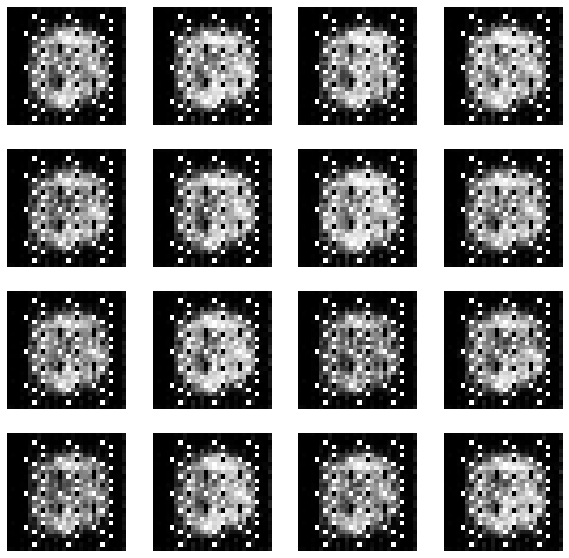

Epoch: 2: 100%|██████████| 235/235 [00:42<00:00,  5.54Batch/s, gen_loss=9.78, disc_loss=0.000131]


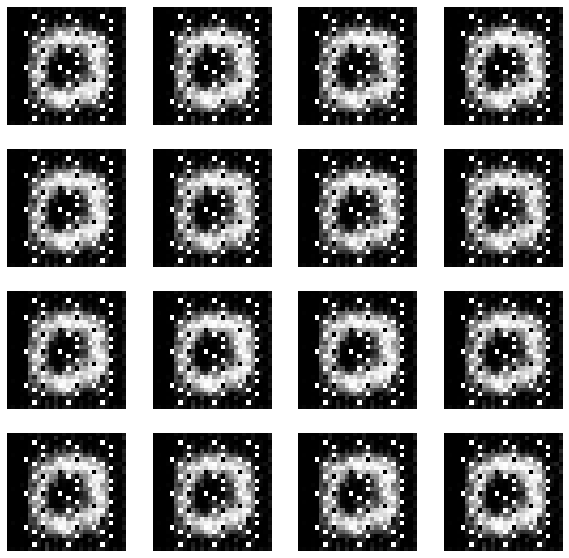

Epoch: 3: 100%|██████████| 235/235 [00:43<00:00,  5.35Batch/s, gen_loss=10.9, disc_loss=3.97e-5]


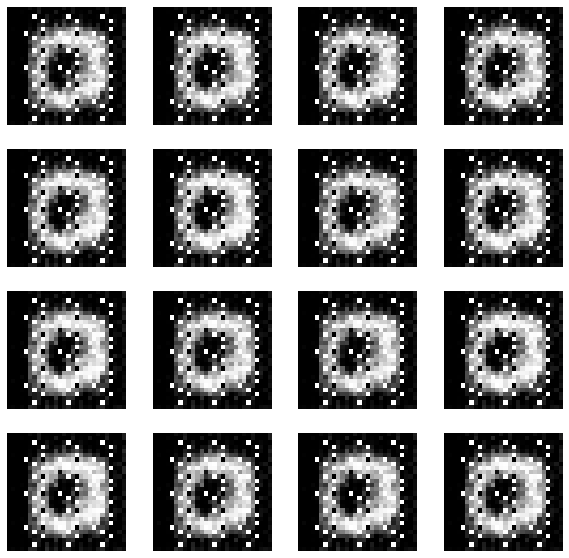

Epoch: 4: 100%|██████████| 235/235 [00:43<00:00,  5.42Batch/s, gen_loss=9.38, disc_loss=0.000389]


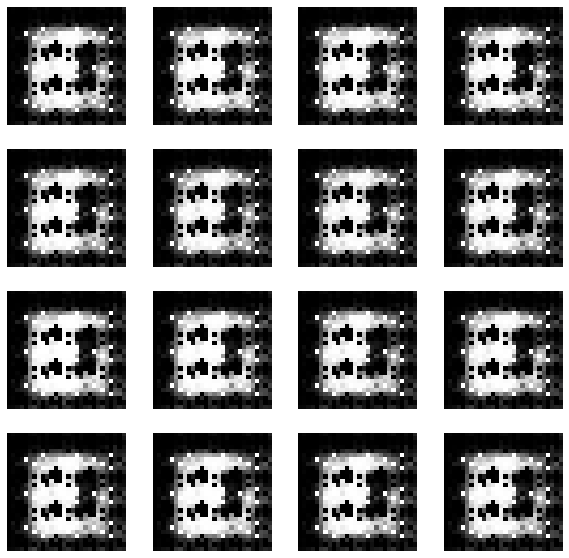

Epoch: 5: 100%|██████████| 235/235 [00:43<00:00,  5.34Batch/s, gen_loss=8.28, disc_loss=0.195]


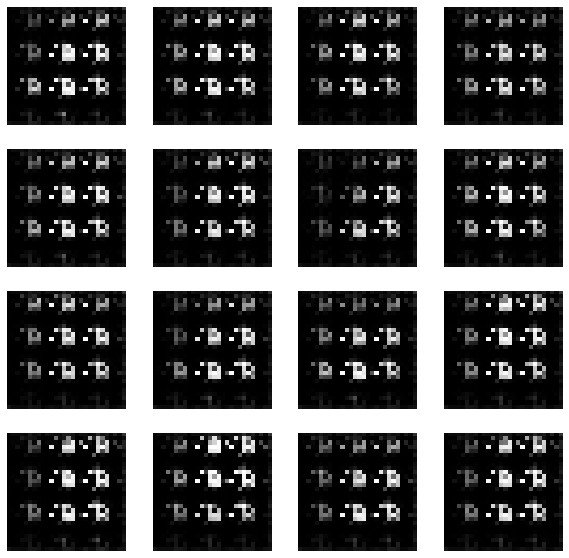

Epoch: 6: 100%|██████████| 235/235 [00:43<00:00,  5.35Batch/s, gen_loss=4.28, disc_loss=0.217]


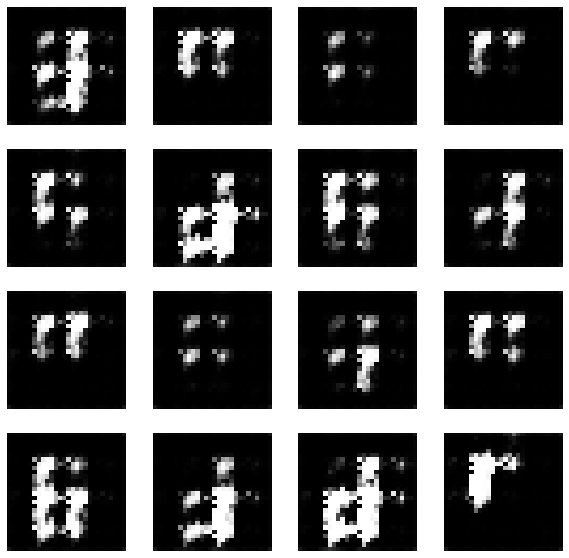

Epoch: 7: 100%|██████████| 235/235 [00:43<00:00,  5.37Batch/s, gen_loss=4.25, disc_loss=0.172]


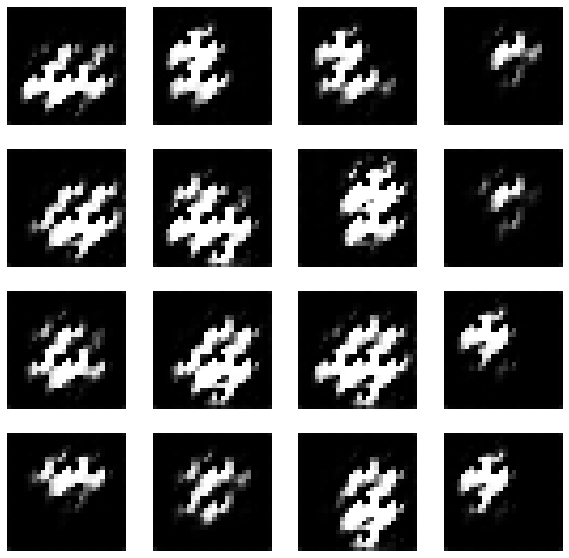

Epoch: 8: 100%|██████████| 235/235 [00:43<00:00,  5.35Batch/s, gen_loss=4.84, disc_loss=0.179]


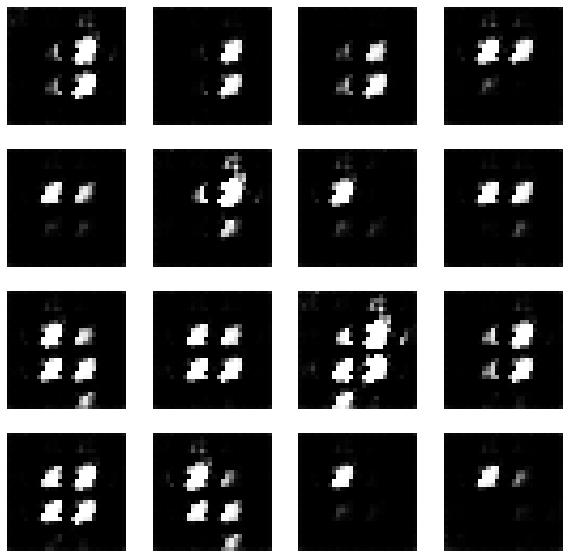

Epoch: 9: 100%|██████████| 235/235 [00:43<00:00,  5.37Batch/s, gen_loss=4.77, disc_loss=0.141]


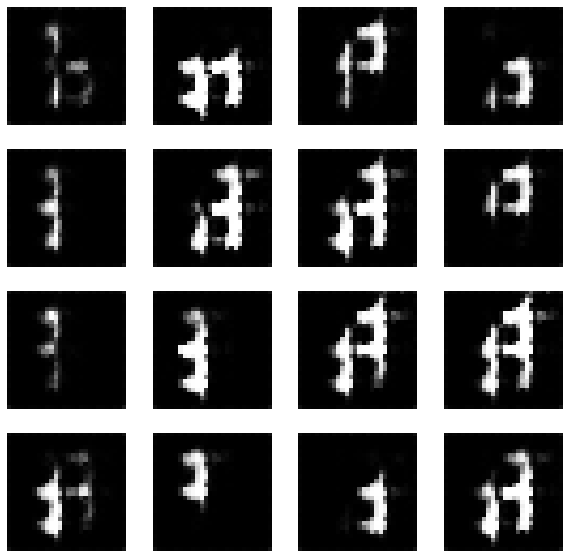

Epoch: 10: 100%|██████████| 235/235 [00:44<00:00,  5.31Batch/s, gen_loss=5.13, disc_loss=0.0823]


saving a checkpoint at epoch 10


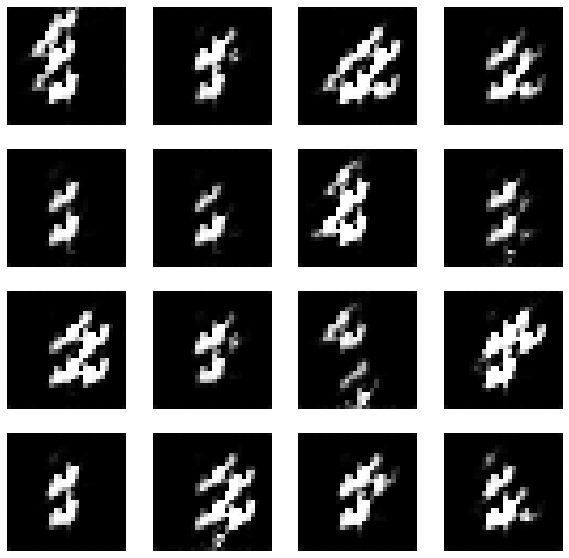

Epoch: 11: 100%|██████████| 235/235 [00:44<00:00,  5.31Batch/s, gen_loss=5.07, disc_loss=0.113]


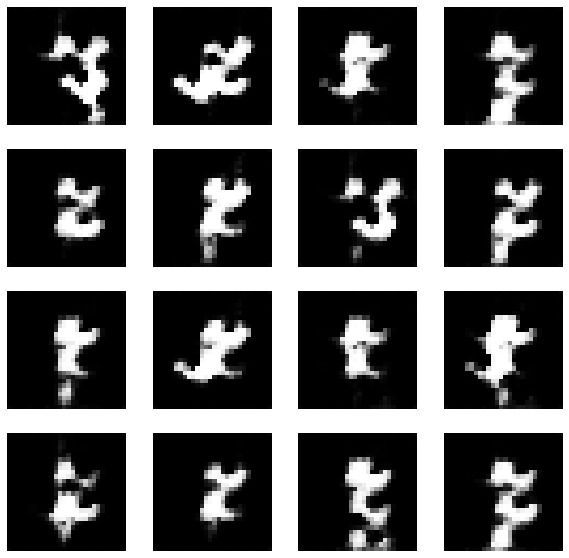

Epoch: 12: 100%|██████████| 235/235 [00:44<00:00,  5.32Batch/s, gen_loss=5.08, disc_loss=0.166]


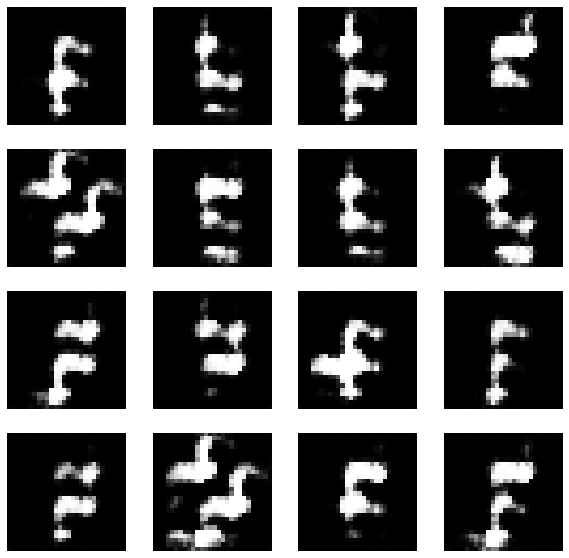

Epoch: 13: 100%|██████████| 235/235 [00:44<00:00,  5.29Batch/s, gen_loss=5.39, disc_loss=0.0848]


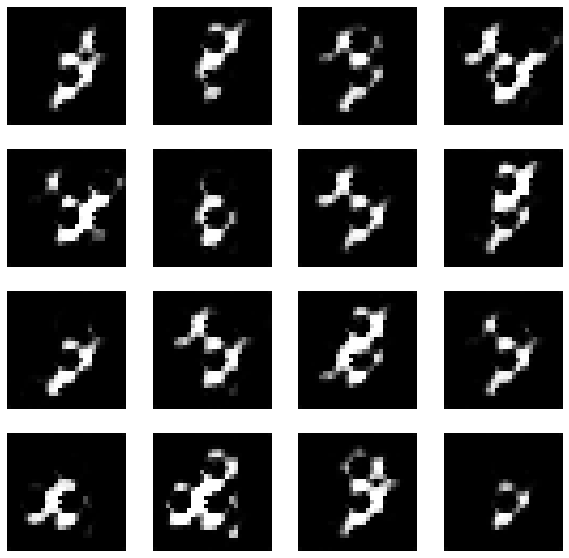

Epoch: 14: 100%|██████████| 235/235 [00:44<00:00,  5.34Batch/s, gen_loss=5.98, disc_loss=0.0823]


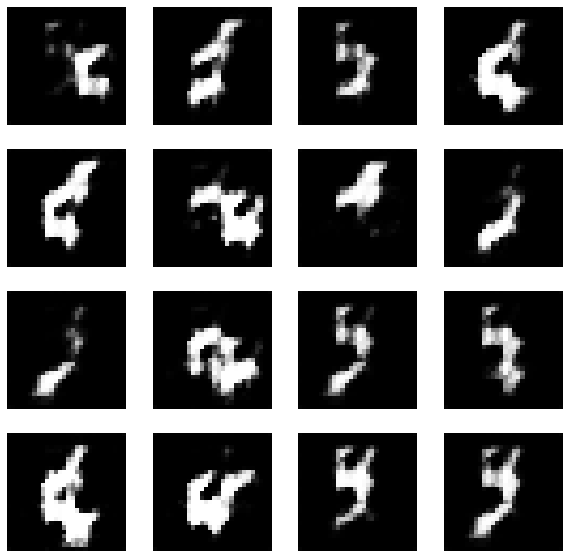

Epoch: 15: 100%|██████████| 235/235 [00:44<00:00,  5.31Batch/s, gen_loss=5.17, disc_loss=0.121]


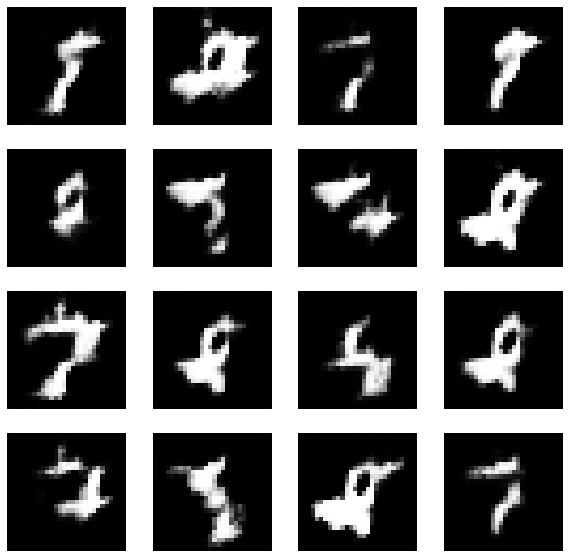

Epoch: 16: 100%|██████████| 235/235 [00:44<00:00,  5.30Batch/s, gen_loss=4.66, disc_loss=0.185]


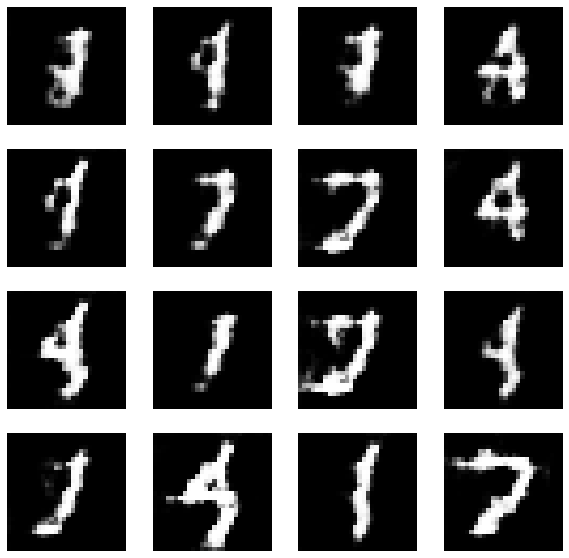

Epoch: 17: 100%|██████████| 235/235 [00:44<00:00,  5.33Batch/s, gen_loss=3.98, disc_loss=0.279]


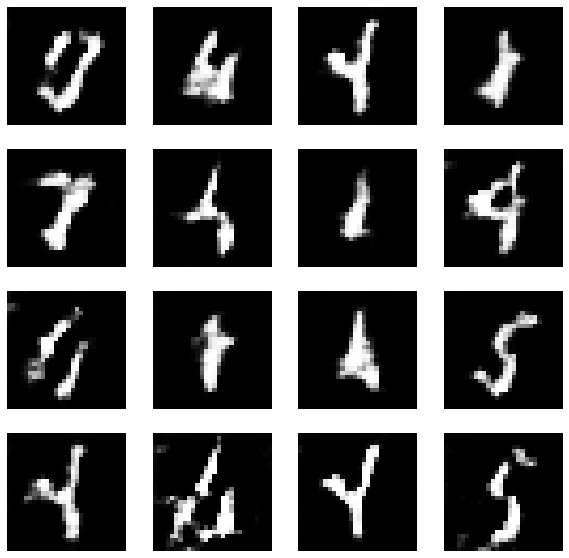

Epoch: 18: 100%|██████████| 235/235 [00:44<00:00,  5.30Batch/s, gen_loss=3.16, disc_loss=0.378]


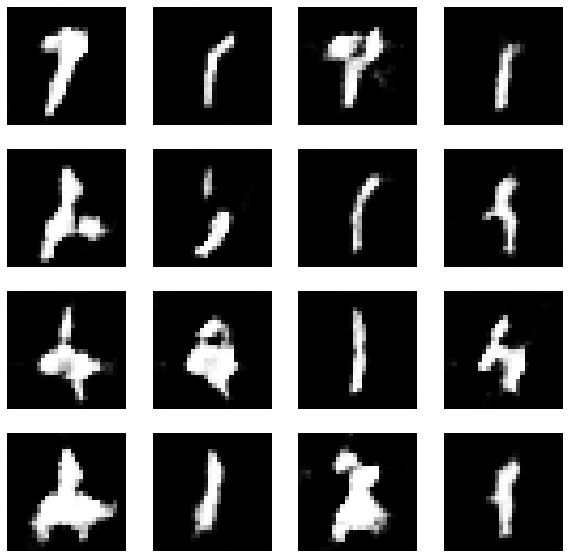

Epoch: 19: 100%|██████████| 235/235 [00:44<00:00,  5.31Batch/s, gen_loss=2.98, disc_loss=0.422]


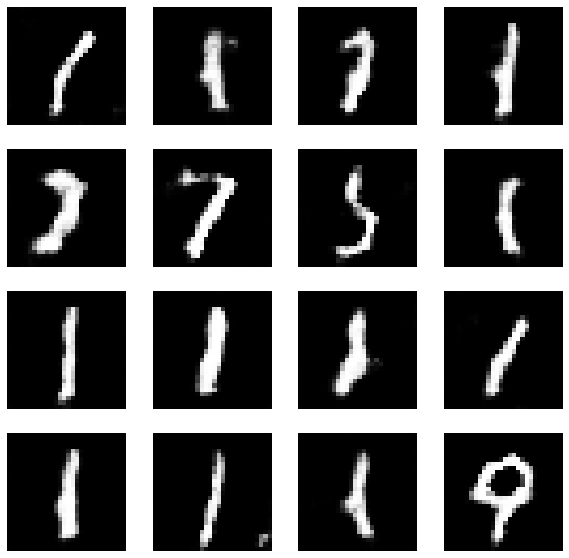

Epoch: 20: 100%|██████████| 235/235 [00:44<00:00,  5.31Batch/s, gen_loss=2.71, disc_loss=0.463]


saving a checkpoint at epoch 20


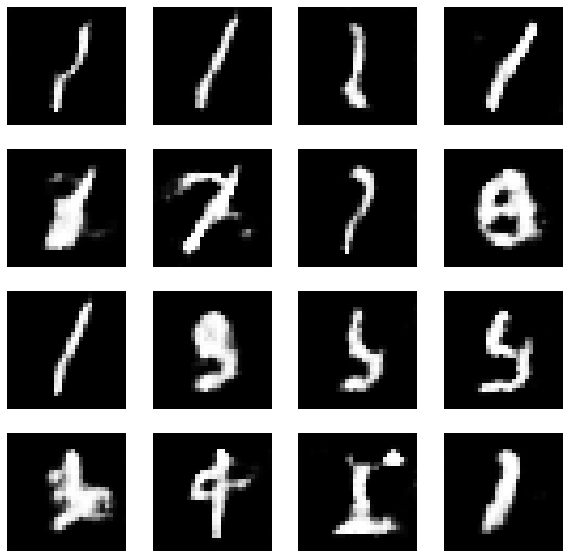

Epoch: 21: 100%|██████████| 235/235 [00:44<00:00,  5.27Batch/s, gen_loss=2.49, disc_loss=0.486]


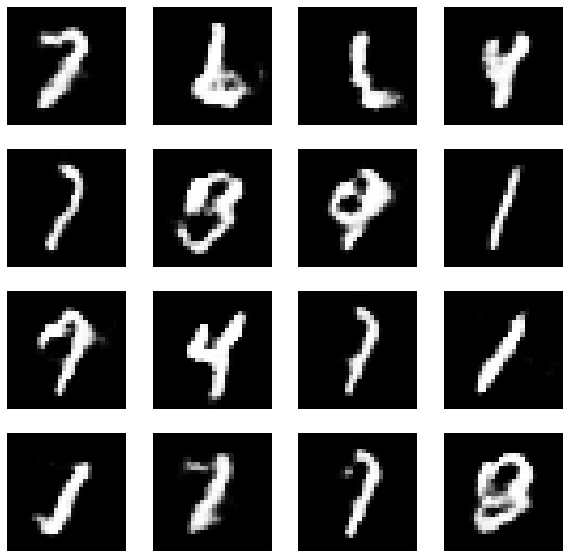

Epoch: 22: 100%|██████████| 235/235 [00:44<00:00,  5.31Batch/s, gen_loss=2.44, disc_loss=0.516]


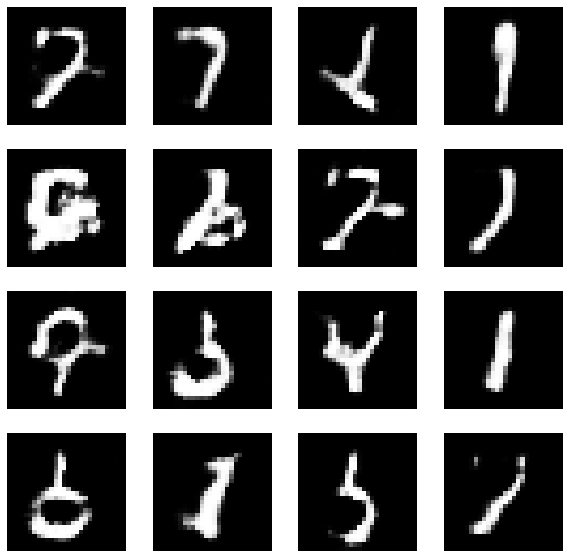

Epoch: 23: 100%|██████████| 235/235 [00:44<00:00,  5.29Batch/s, gen_loss=2.28, disc_loss=0.546]


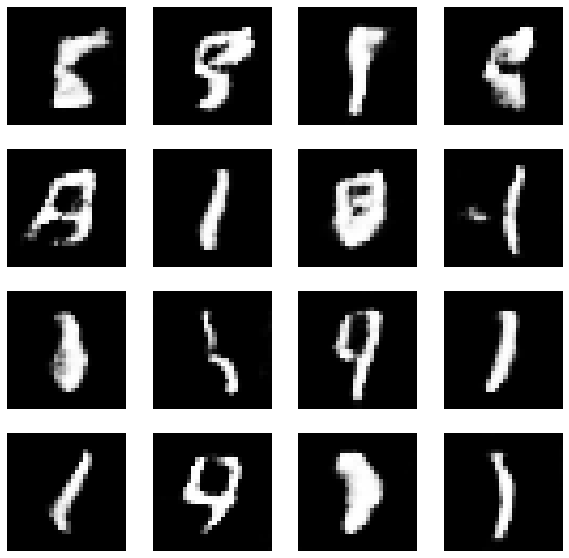

Epoch: 24: 100%|██████████| 235/235 [00:44<00:00,  5.30Batch/s, gen_loss=2.22, disc_loss=0.573]


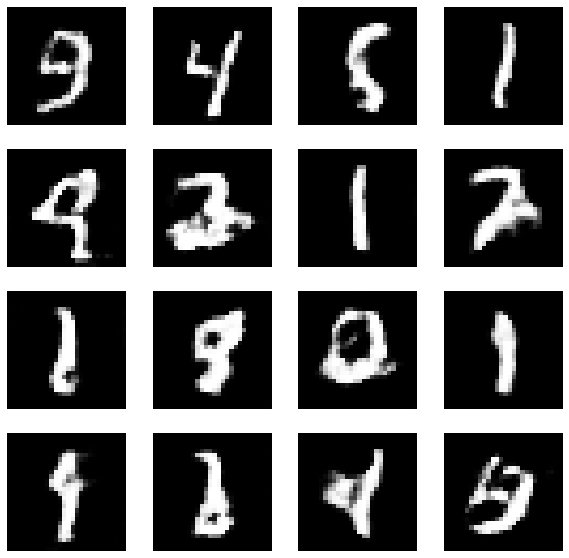

Epoch: 25: 100%|██████████| 235/235 [00:44<00:00,  5.30Batch/s, gen_loss=2.09, disc_loss=0.624]


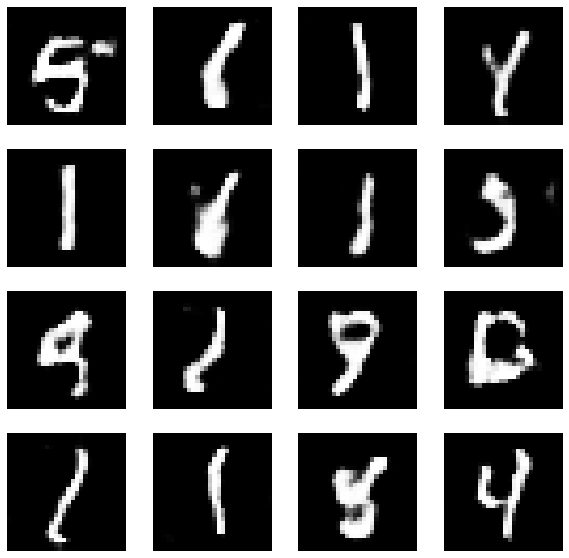

Epoch: 26: 100%|██████████| 235/235 [00:44<00:00,  5.30Batch/s, gen_loss=2.07, disc_loss=0.643]


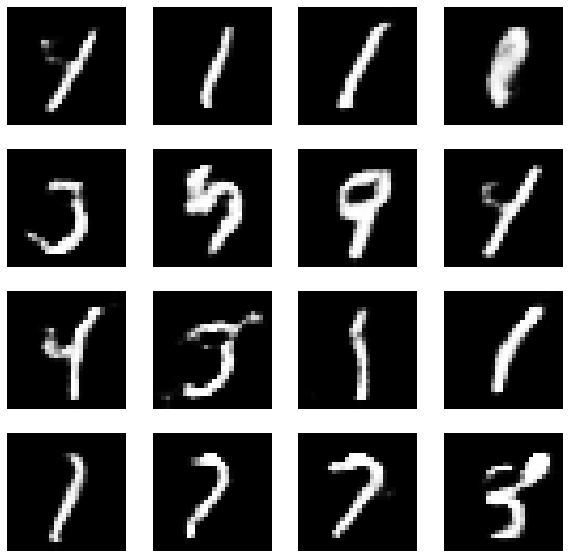

Epoch: 27: 100%|██████████| 235/235 [00:44<00:00,  5.31Batch/s, gen_loss=1.97, disc_loss=0.668]


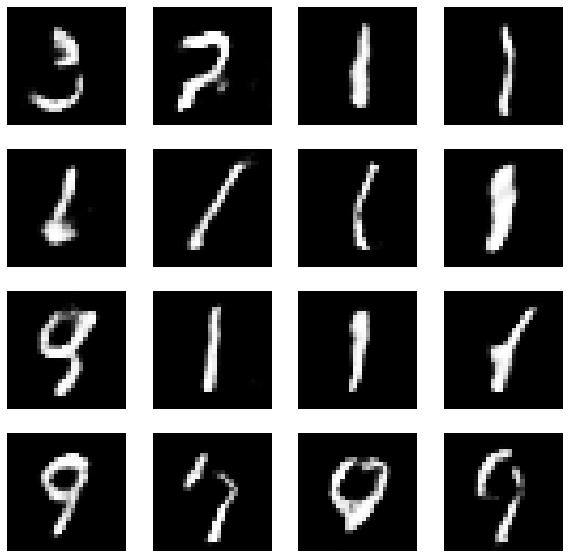

Epoch: 28: 100%|██████████| 235/235 [00:44<00:00,  5.29Batch/s, gen_loss=1.94, disc_loss=0.675]


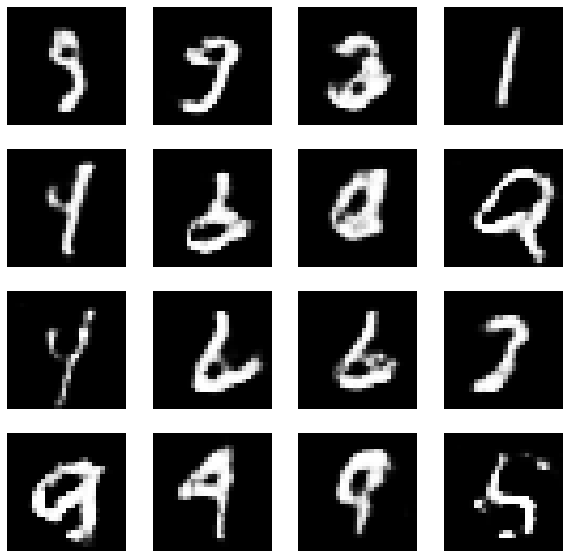

Epoch: 29: 100%|██████████| 235/235 [00:44<00:00,  5.27Batch/s, gen_loss=1.92, disc_loss=0.699]


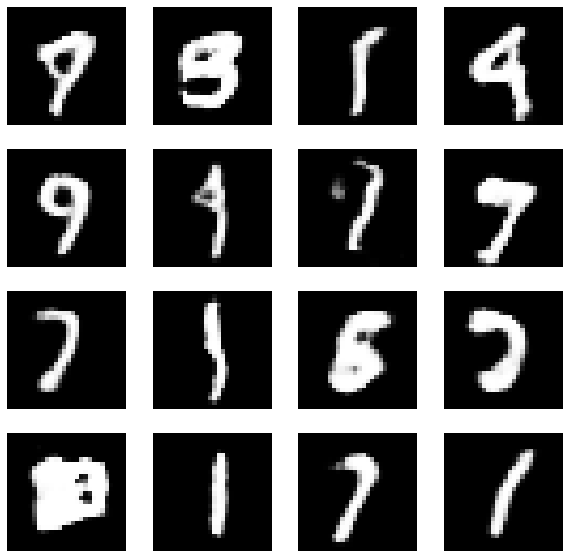

Epoch: 30: 100%|██████████| 235/235 [00:44<00:00,  5.29Batch/s, gen_loss=1.92, disc_loss=0.713]


saving a checkpoint at epoch 30


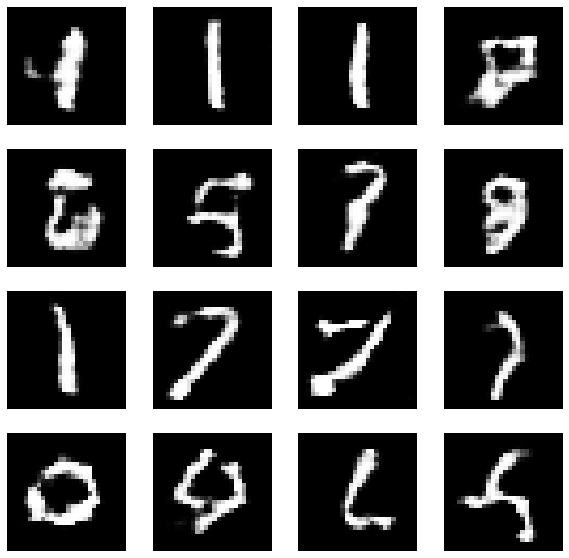

Epoch: 31: 100%|██████████| 235/235 [00:44<00:00,  5.28Batch/s, gen_loss=1.86, disc_loss=0.715]


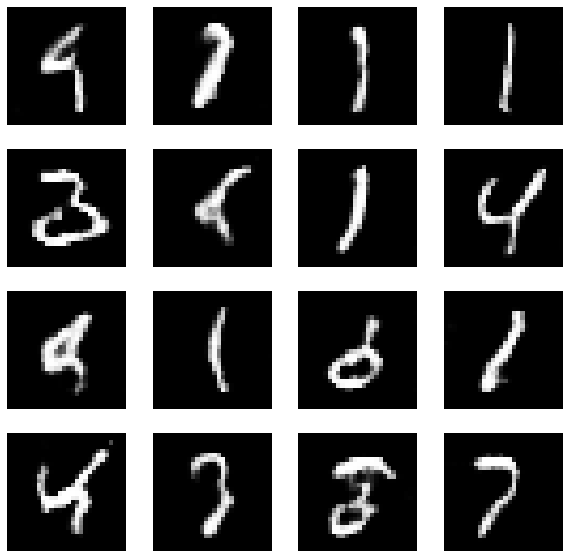

Epoch: 32: 100%|██████████| 235/235 [00:44<00:00,  5.28Batch/s, gen_loss=1.86, disc_loss=0.713]


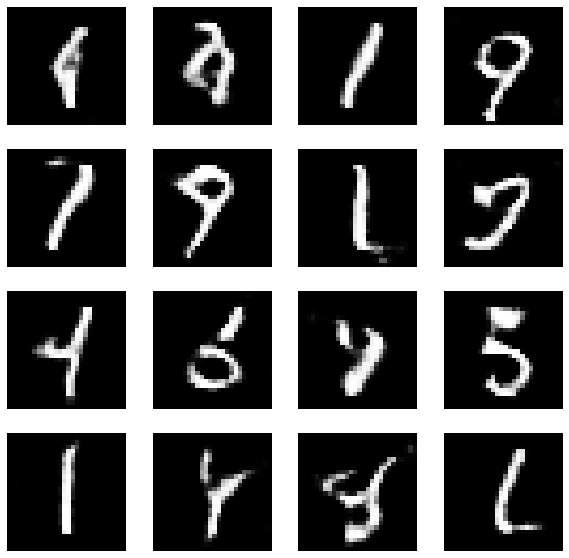

Epoch: 33: 100%|██████████| 235/235 [00:44<00:00,  5.28Batch/s, gen_loss=1.82, disc_loss=0.73]


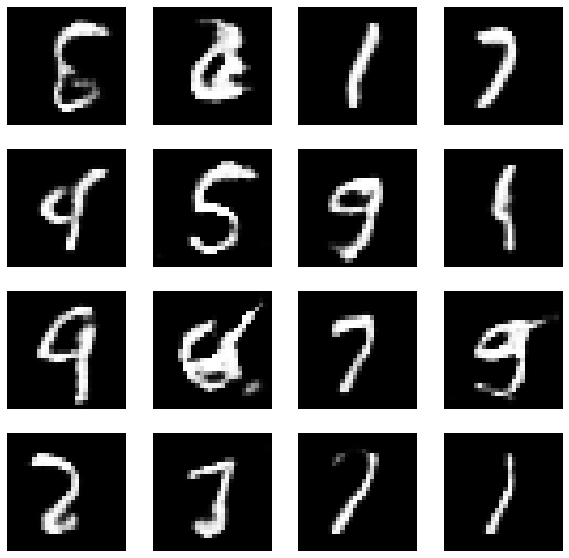

Epoch: 34: 100%|██████████| 235/235 [00:44<00:00,  5.26Batch/s, gen_loss=1.78, disc_loss=0.732]


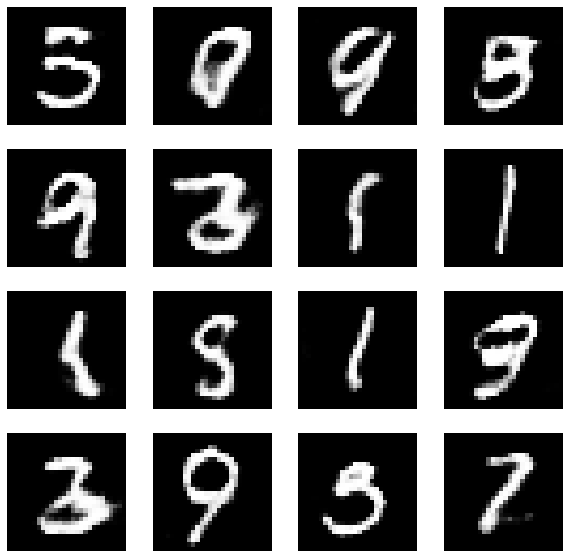

Epoch: 35: 100%|██████████| 235/235 [00:44<00:00,  5.29Batch/s, gen_loss=1.8, disc_loss=0.756]


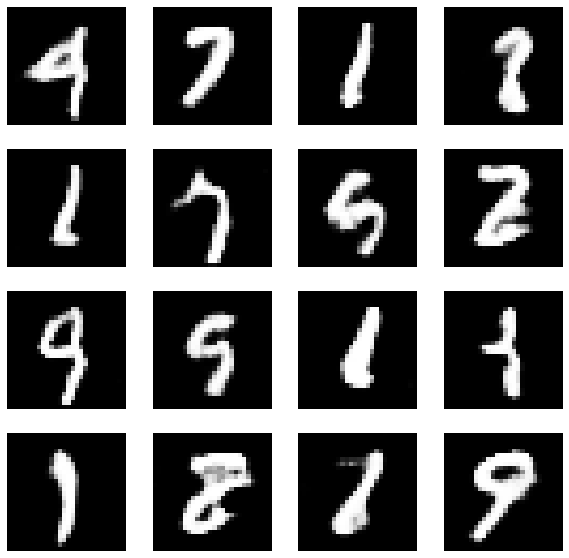

Epoch: 36: 100%|██████████| 235/235 [00:44<00:00,  5.27Batch/s, gen_loss=1.78, disc_loss=0.766]


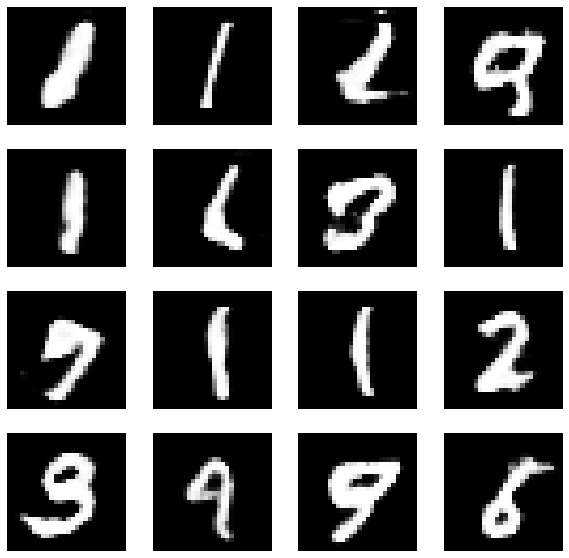

Epoch: 37: 100%|██████████| 235/235 [00:44<00:00,  5.30Batch/s, gen_loss=1.73, disc_loss=0.78]


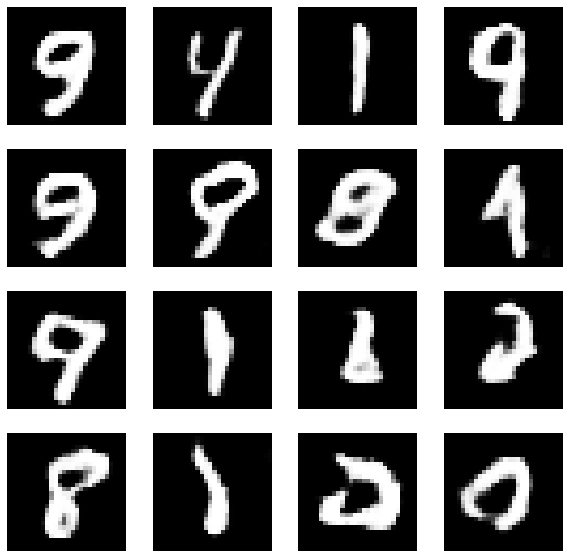

Epoch: 38: 100%|██████████| 235/235 [00:44<00:00,  5.26Batch/s, gen_loss=1.78, disc_loss=0.78]


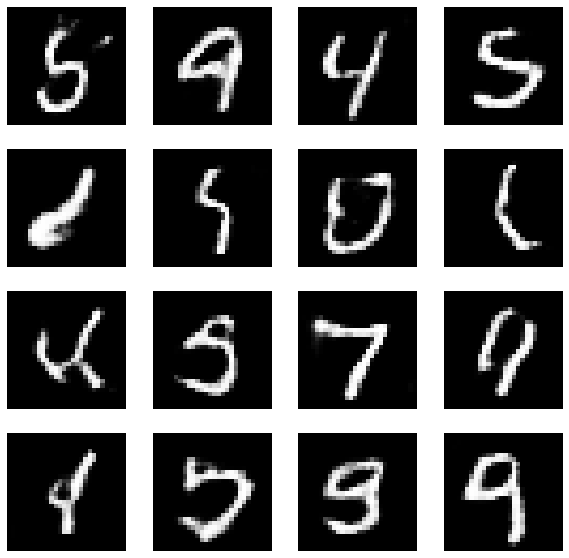

Epoch: 39: 100%|██████████| 235/235 [00:44<00:00,  5.24Batch/s, gen_loss=1.72, disc_loss=0.776]


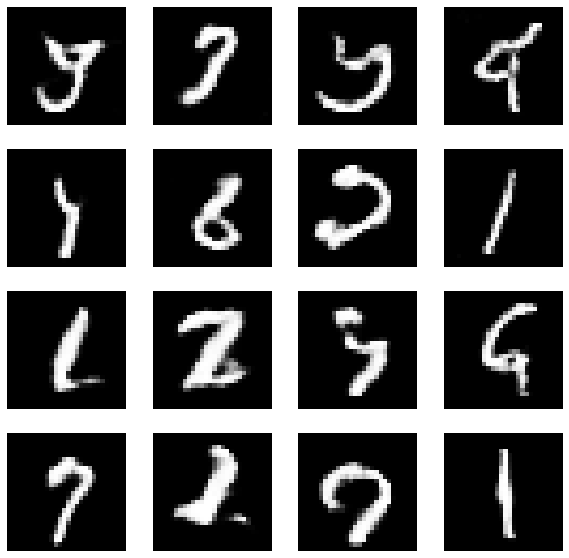

Epoch: 40: 100%|██████████| 235/235 [00:44<00:00,  5.23Batch/s, gen_loss=1.72, disc_loss=0.781]


saving a checkpoint at epoch 40


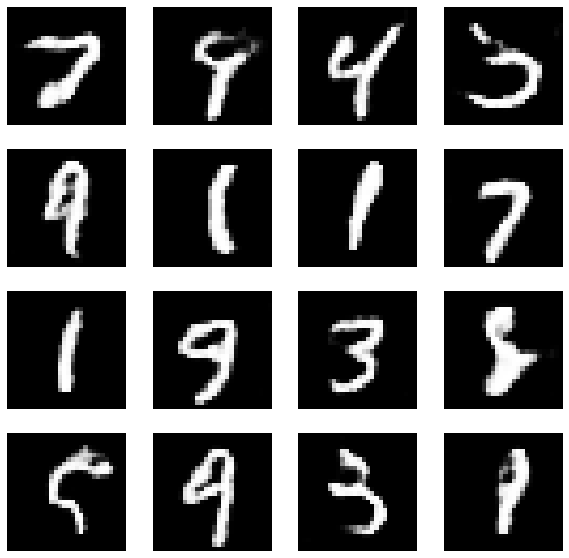

Epoch: 41: 100%|██████████| 235/235 [00:44<00:00,  5.23Batch/s, gen_loss=1.7, disc_loss=0.777]


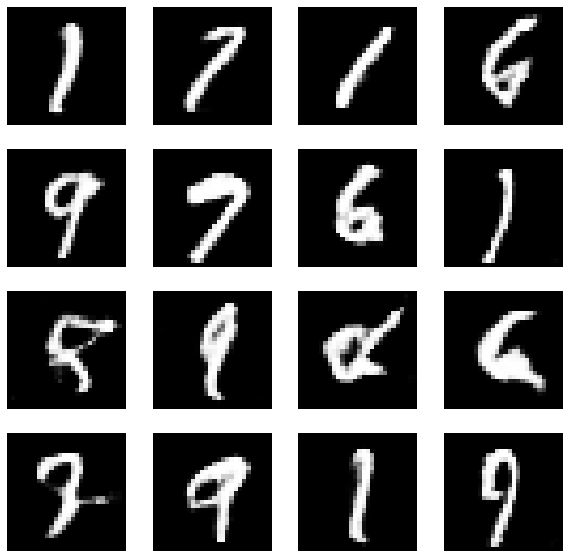

Epoch: 42: 100%|██████████| 235/235 [00:44<00:00,  5.25Batch/s, gen_loss=1.7, disc_loss=0.783]


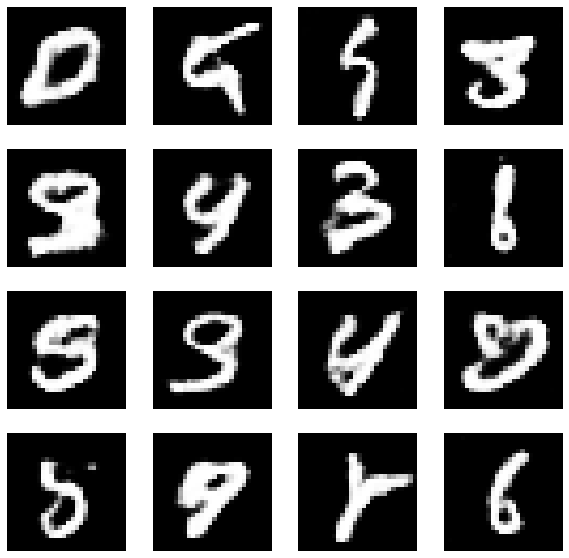

Epoch: 43: 100%|██████████| 235/235 [00:48<00:00,  4.84Batch/s, gen_loss=1.73, disc_loss=0.795]


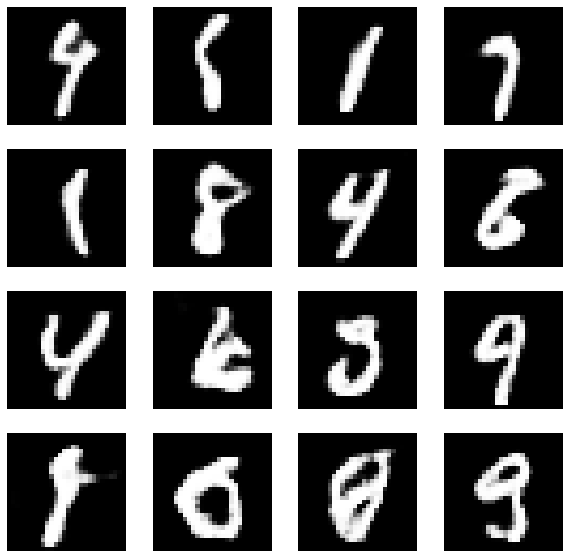

Epoch: 44: 100%|██████████| 235/235 [00:45<00:00,  5.18Batch/s, gen_loss=1.69, disc_loss=0.786]


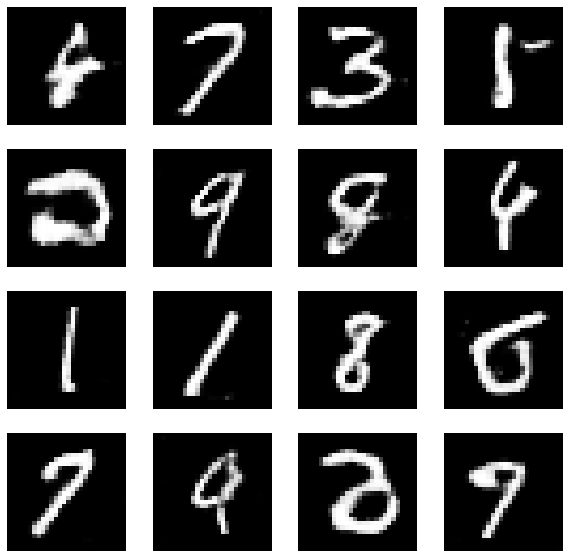

Epoch: 45: 100%|██████████| 235/235 [00:44<00:00,  5.23Batch/s, gen_loss=1.68, disc_loss=0.793]


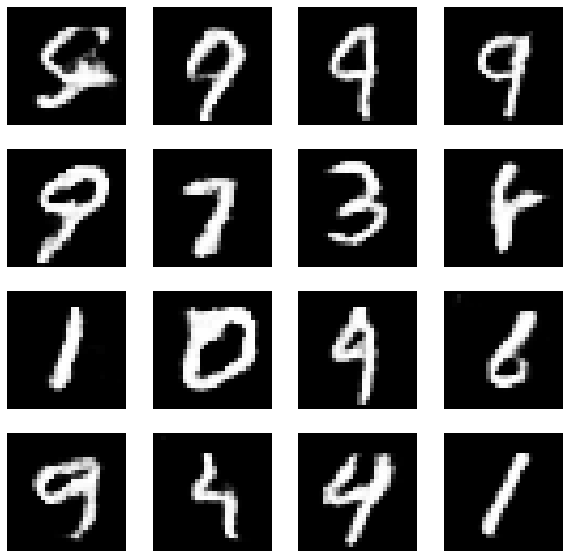

Epoch: 46: 100%|██████████| 235/235 [00:44<00:00,  5.26Batch/s, gen_loss=1.67, disc_loss=0.805]


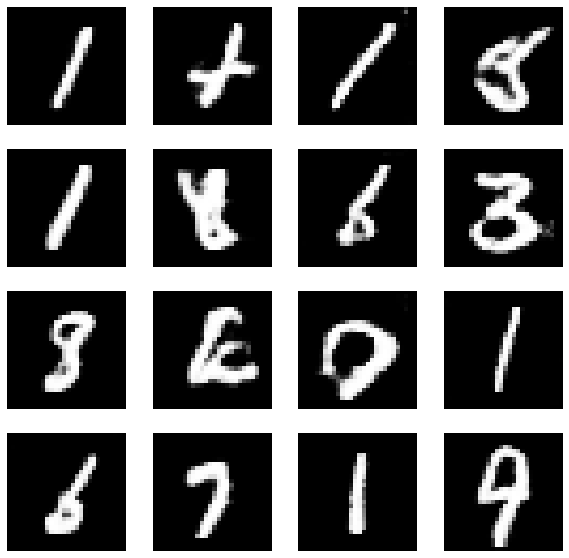

Epoch: 47: 100%|██████████| 235/235 [00:45<00:00,  5.20Batch/s, gen_loss=1.68, disc_loss=0.789]


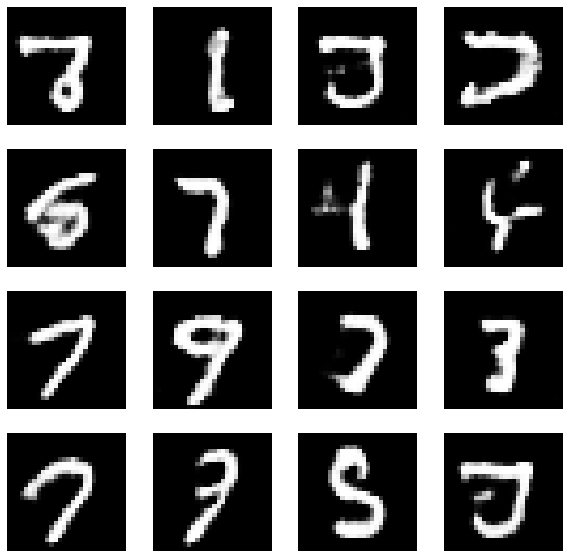

Epoch: 48: 100%|██████████| 235/235 [00:45<00:00,  5.21Batch/s, gen_loss=1.67, disc_loss=0.788]


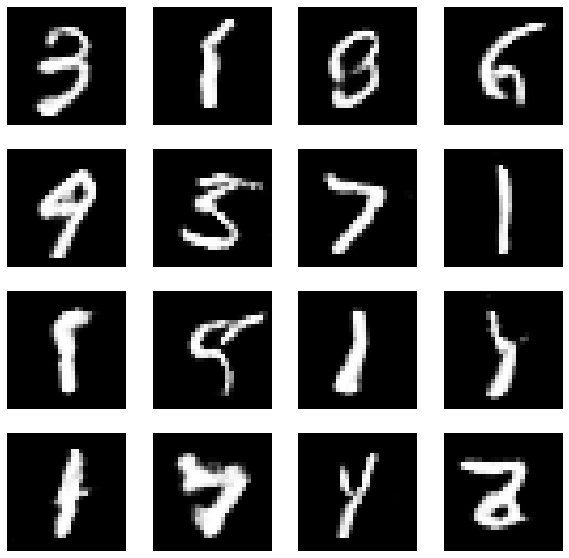

Epoch: 49: 100%|██████████| 235/235 [00:45<00:00,  5.19Batch/s, gen_loss=1.65, disc_loss=0.789]


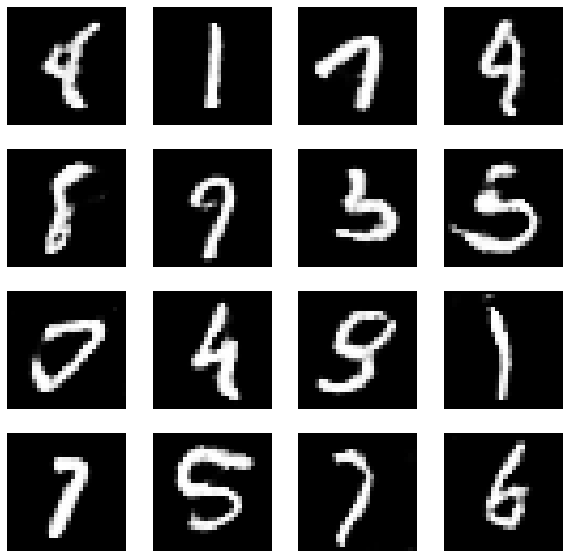

Epoch: 50: 100%|██████████| 235/235 [00:45<00:00,  5.19Batch/s, gen_loss=1.63, disc_loss=0.791]


saving a checkpoint at epoch 50


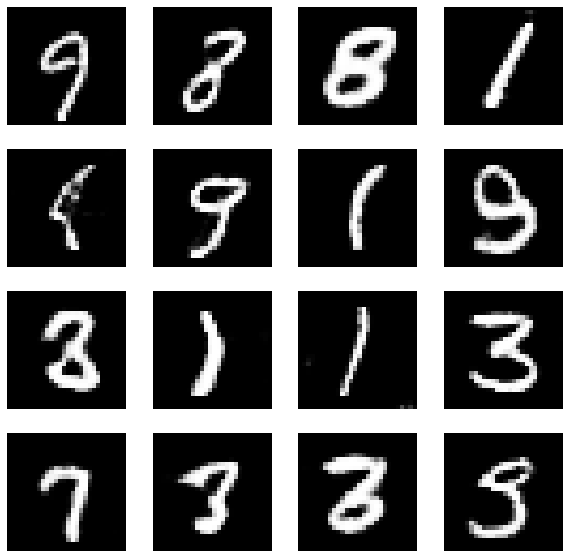

Epoch: 51: 100%|██████████| 235/235 [00:45<00:00,  5.20Batch/s, gen_loss=1.61, disc_loss=0.792]


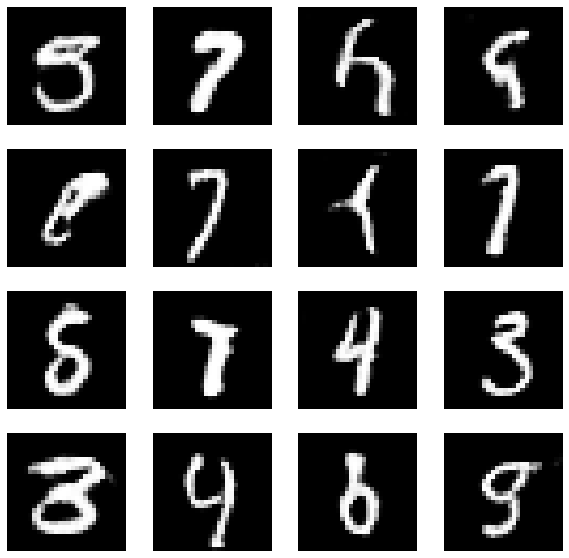

Epoch: 52: 100%|██████████| 235/235 [00:45<00:00,  5.15Batch/s, gen_loss=1.62, disc_loss=0.794]


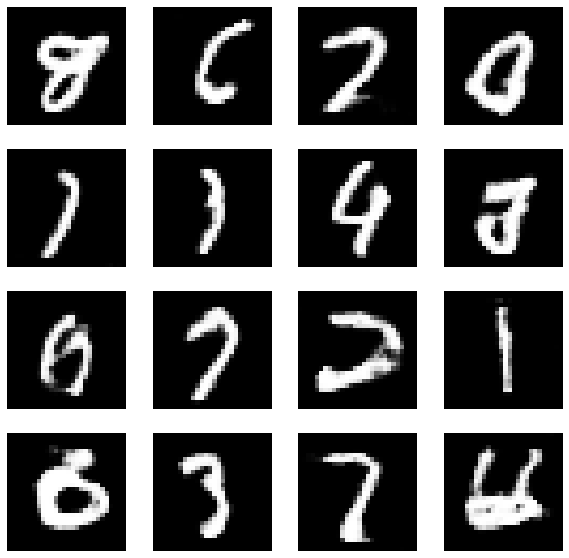

Epoch: 53: 100%|██████████| 235/235 [00:45<00:00,  5.20Batch/s, gen_loss=1.63, disc_loss=0.799]


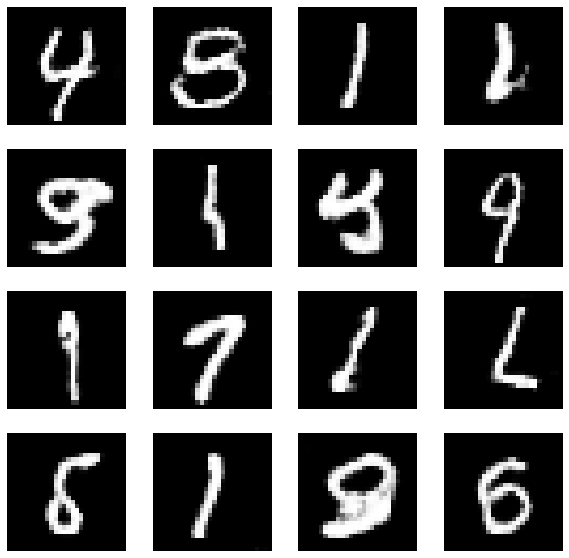

Epoch: 54: 100%|██████████| 235/235 [00:45<00:00,  5.18Batch/s, gen_loss=1.67, disc_loss=0.796]


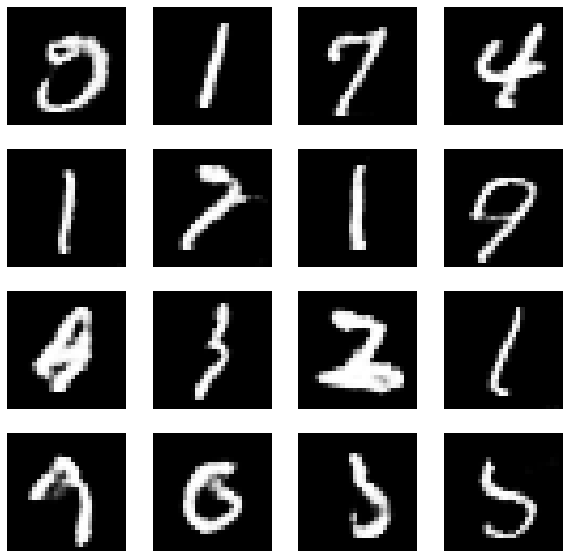

Epoch: 55: 100%|██████████| 235/235 [00:45<00:00,  5.16Batch/s, gen_loss=1.71, disc_loss=0.813]


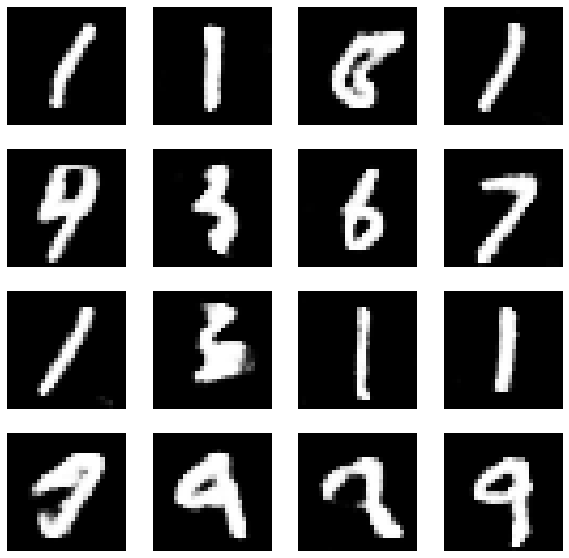

Epoch: 56: 100%|██████████| 235/235 [00:45<00:00,  5.19Batch/s, gen_loss=1.72, disc_loss=0.804]


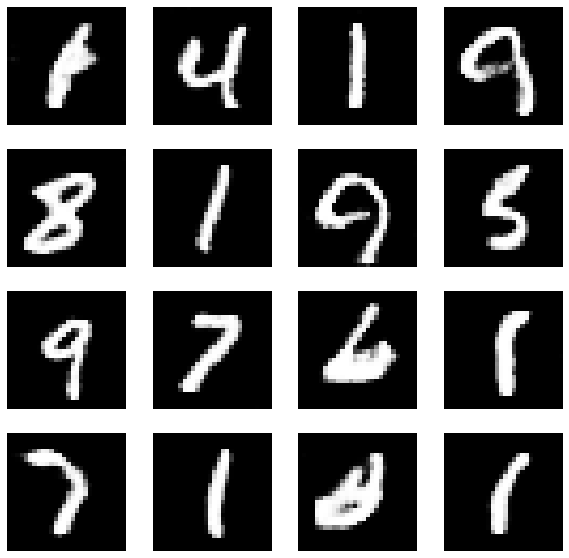

Epoch: 57: 100%|██████████| 235/235 [00:45<00:00,  5.13Batch/s, gen_loss=1.7, disc_loss=0.794]


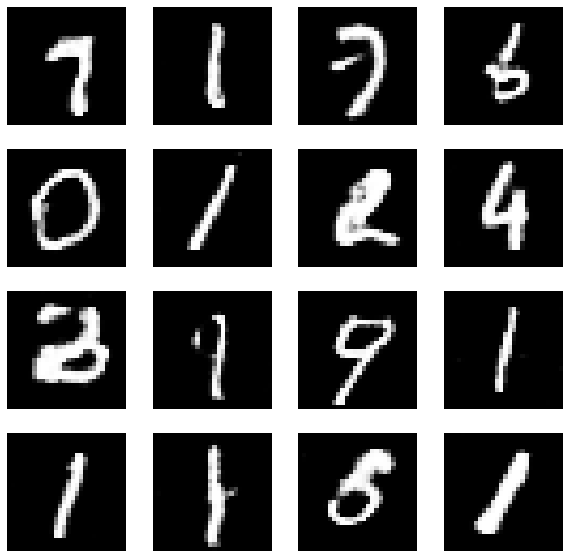

Epoch: 58: 100%|██████████| 235/235 [00:45<00:00,  5.16Batch/s, gen_loss=1.64, disc_loss=0.79]


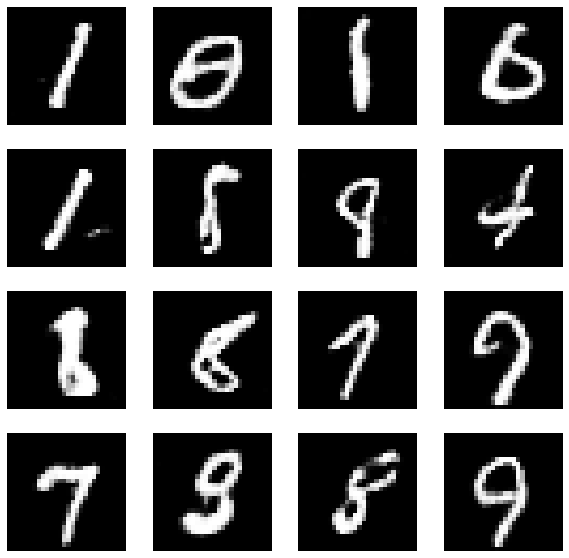

Epoch: 59: 100%|██████████| 235/235 [00:46<00:00,  5.01Batch/s, gen_loss=1.63, disc_loss=0.785]


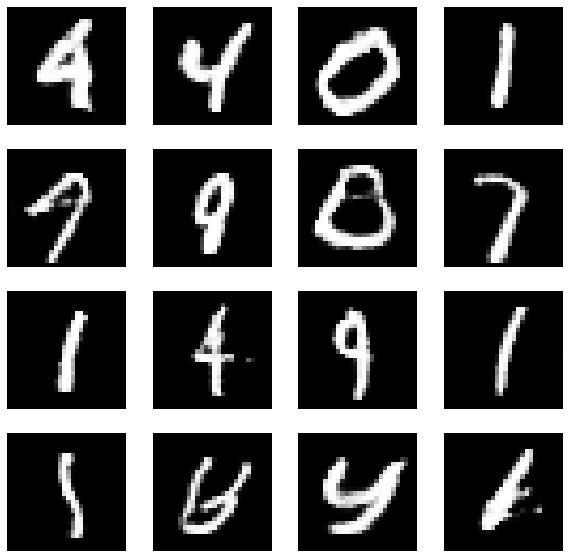

Epoch: 60: 100%|██████████| 235/235 [00:45<00:00,  5.14Batch/s, gen_loss=1.64, disc_loss=0.782]


saving a checkpoint at epoch 60


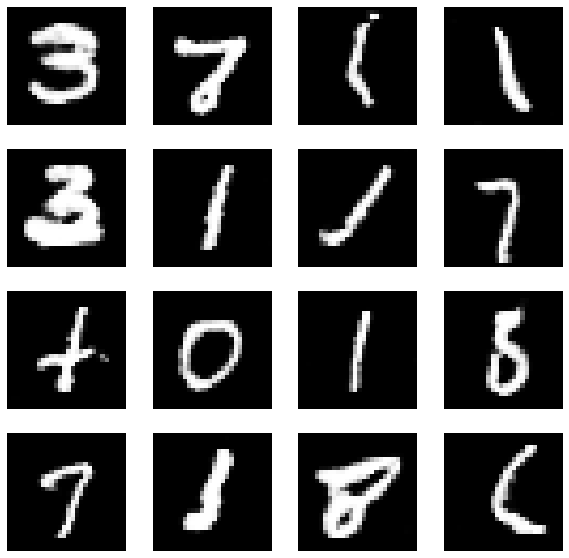

Epoch: 61: 100%|██████████| 235/235 [00:45<00:00,  5.12Batch/s, gen_loss=1.65, disc_loss=0.784]


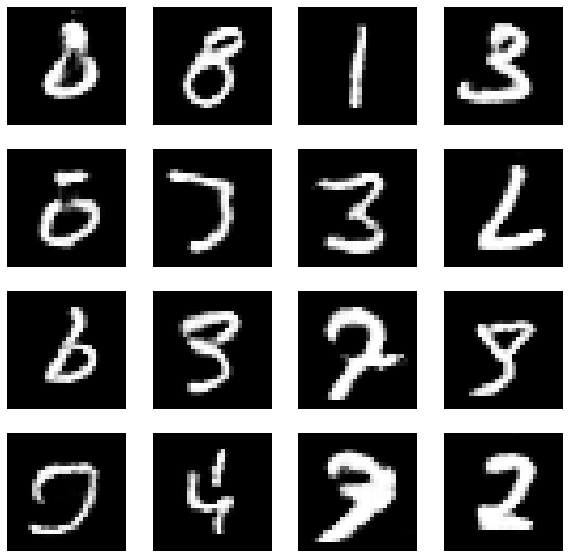

Epoch: 62: 100%|██████████| 235/235 [00:45<00:00,  5.18Batch/s, gen_loss=1.64, disc_loss=0.785]


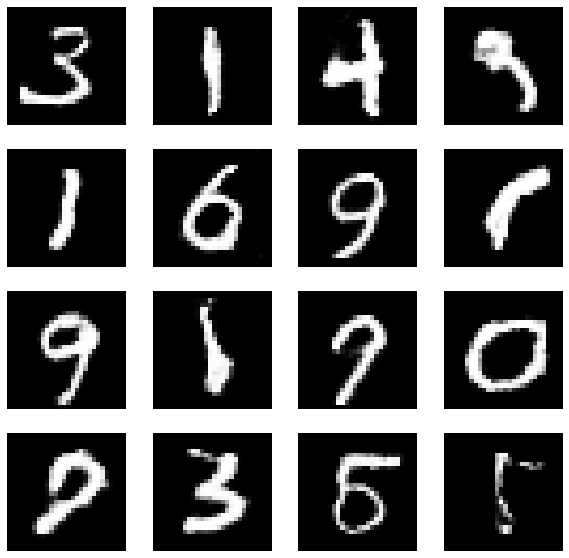

Epoch: 63: 100%|██████████| 235/235 [00:45<00:00,  5.17Batch/s, gen_loss=1.65, disc_loss=0.774]


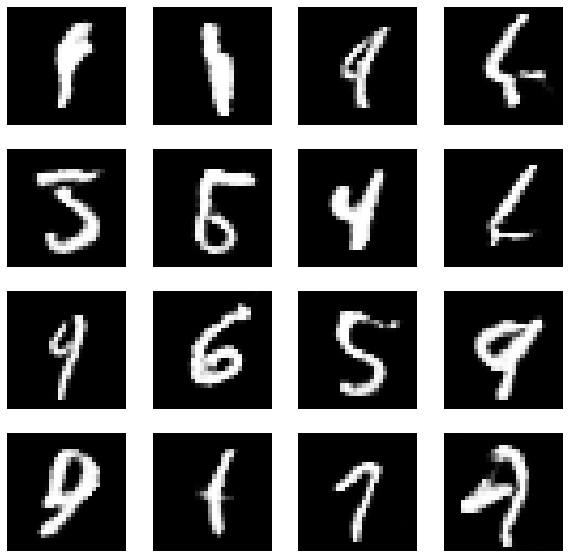

Epoch: 64: 100%|██████████| 235/235 [00:45<00:00,  5.18Batch/s, gen_loss=1.67, disc_loss=0.776]


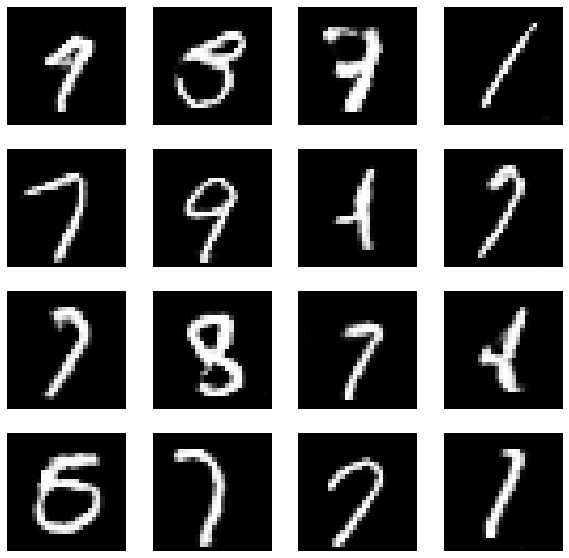

Epoch: 65: 100%|██████████| 235/235 [00:45<00:00,  5.13Batch/s, gen_loss=1.71, disc_loss=0.776]


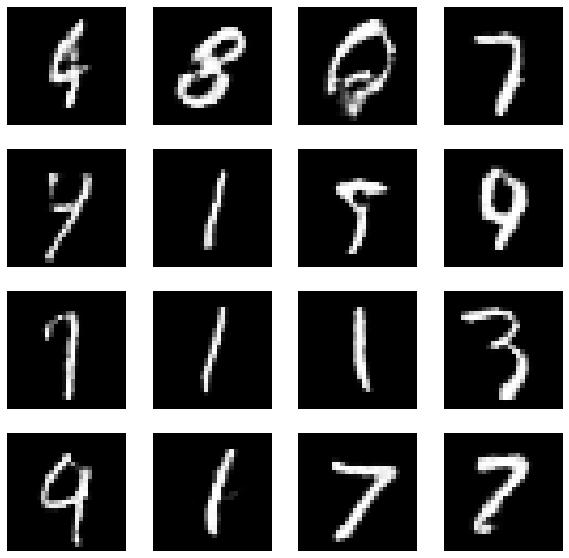

Epoch: 66: 100%|██████████| 235/235 [00:45<00:00,  5.15Batch/s, gen_loss=1.73, disc_loss=0.778]


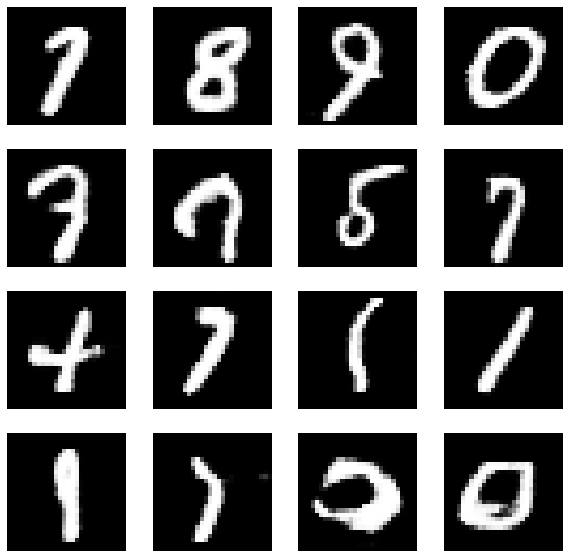

Epoch: 67: 100%|██████████| 235/235 [00:45<00:00,  5.14Batch/s, gen_loss=1.74, disc_loss=0.769]


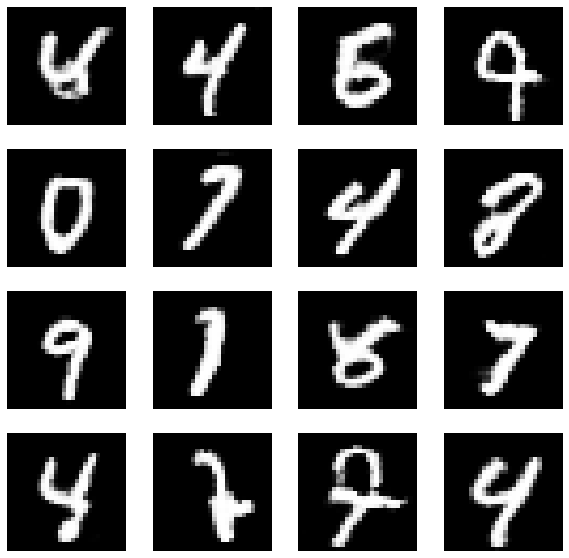

Epoch: 68: 100%|██████████| 235/235 [00:45<00:00,  5.15Batch/s, gen_loss=1.72, disc_loss=0.768]


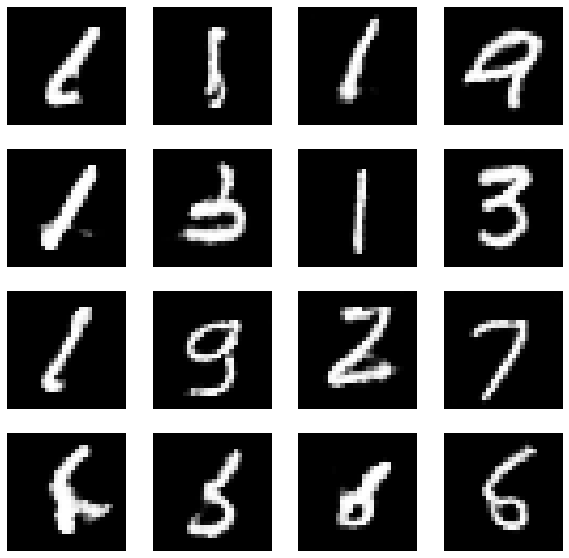

Epoch: 69: 100%|██████████| 235/235 [00:45<00:00,  5.16Batch/s, gen_loss=1.69, disc_loss=0.757]


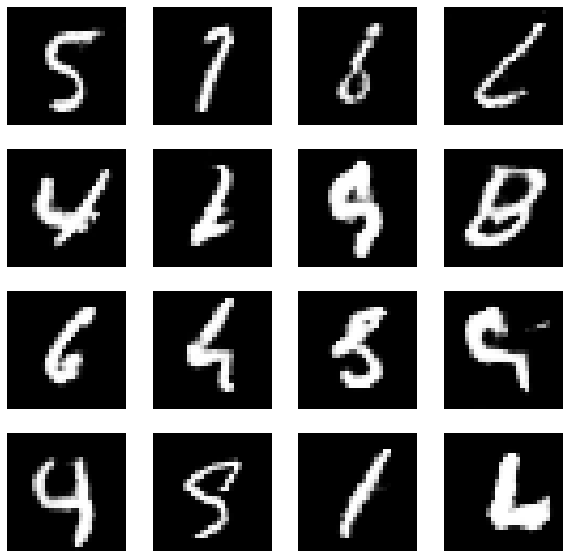

Epoch: 70: 100%|██████████| 235/235 [00:45<00:00,  5.16Batch/s, gen_loss=1.7, disc_loss=0.759]


saving a checkpoint at epoch 70


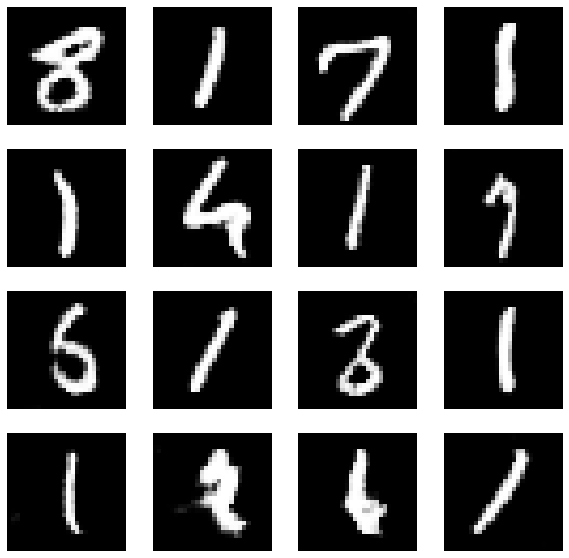

Epoch: 71: 100%|██████████| 235/235 [00:45<00:00,  5.12Batch/s, gen_loss=1.7, disc_loss=0.749]


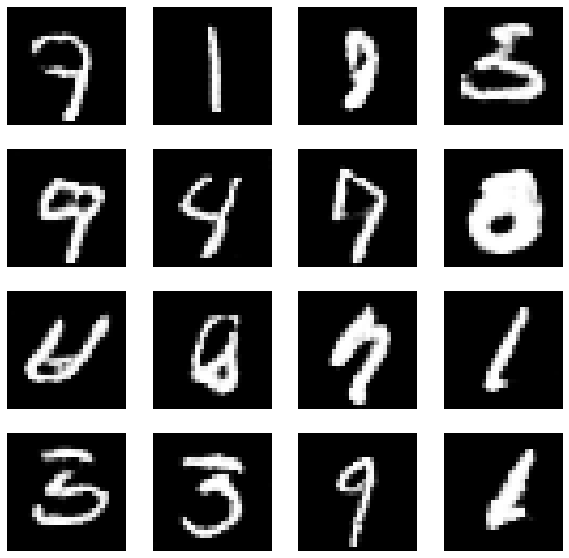

Epoch: 72: 100%|██████████| 235/235 [00:45<00:00,  5.16Batch/s, gen_loss=1.7, disc_loss=0.75]


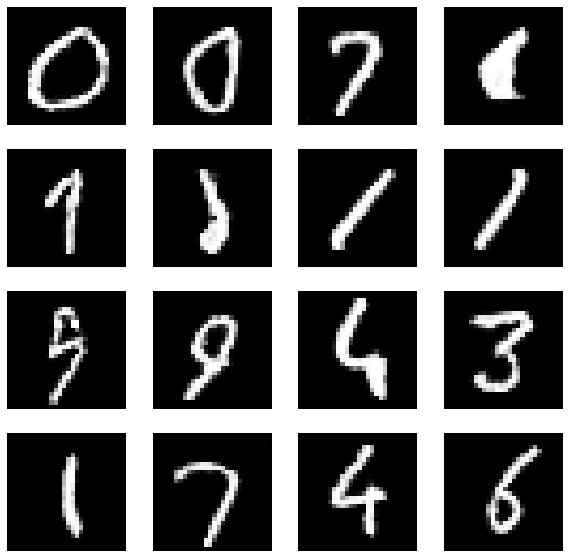

Epoch: 73: 100%|██████████| 235/235 [00:45<00:00,  5.14Batch/s, gen_loss=1.72, disc_loss=0.742]


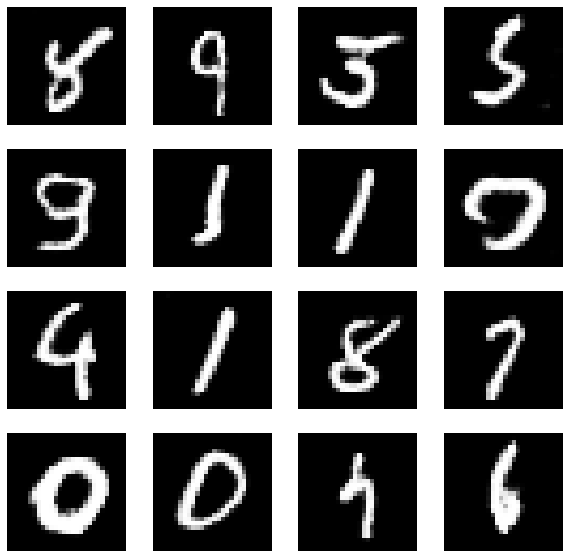

Epoch: 74: 100%|██████████| 235/235 [00:45<00:00,  5.12Batch/s, gen_loss=1.72, disc_loss=0.743]


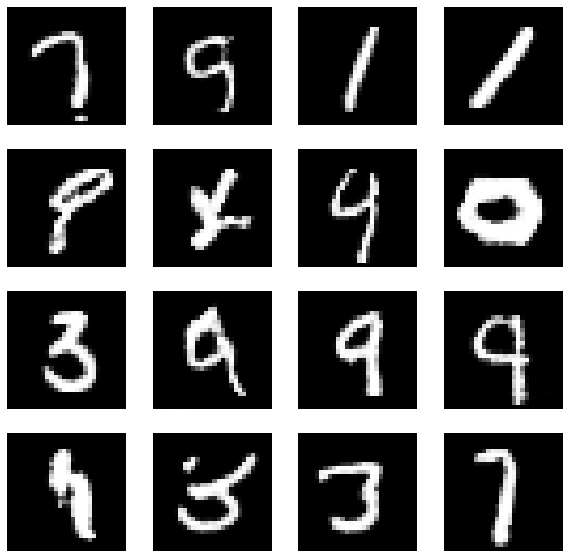

Epoch: 75: 100%|██████████| 235/235 [00:45<00:00,  5.12Batch/s, gen_loss=1.73, disc_loss=0.737]


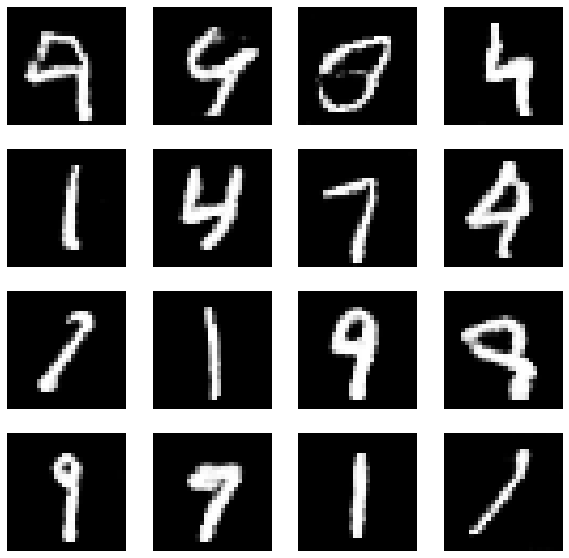

Epoch: 76: 100%|██████████| 235/235 [00:45<00:00,  5.14Batch/s, gen_loss=1.74, disc_loss=0.734]


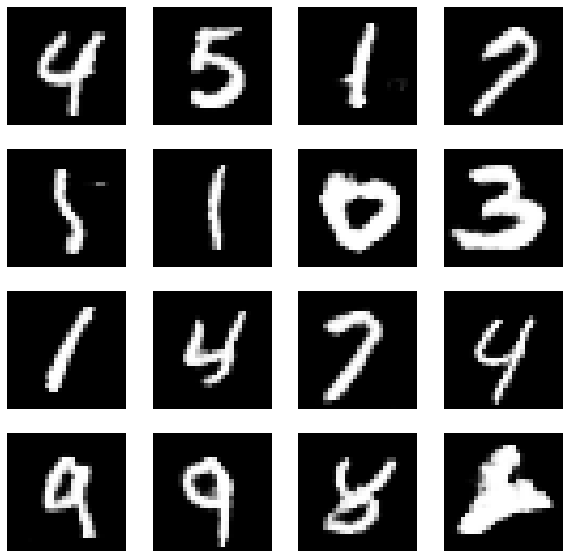

Epoch: 77: 100%|██████████| 235/235 [00:45<00:00,  5.14Batch/s, gen_loss=1.75, disc_loss=0.735]


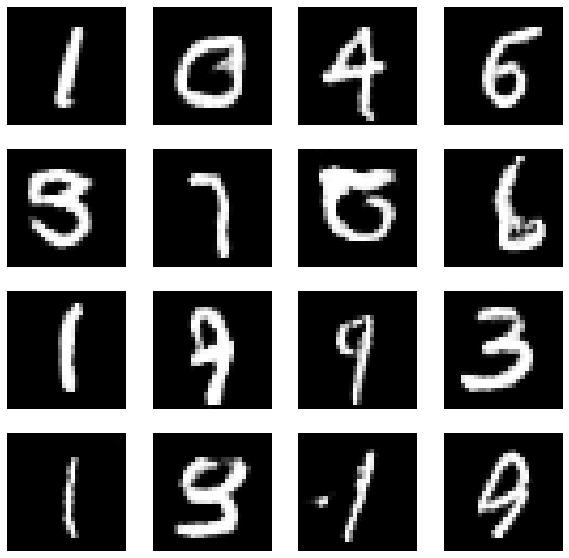

Epoch: 78: 100%|██████████| 235/235 [00:46<00:00,  5.09Batch/s, gen_loss=1.77, disc_loss=0.731]


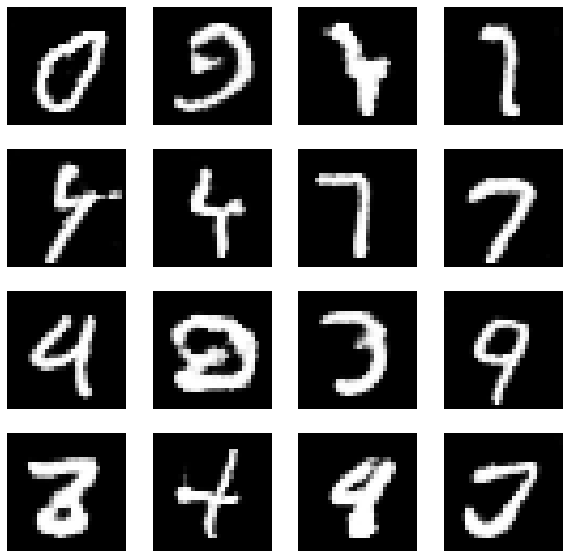

Epoch: 79: 100%|██████████| 235/235 [00:45<00:00,  5.13Batch/s, gen_loss=1.76, disc_loss=0.73]


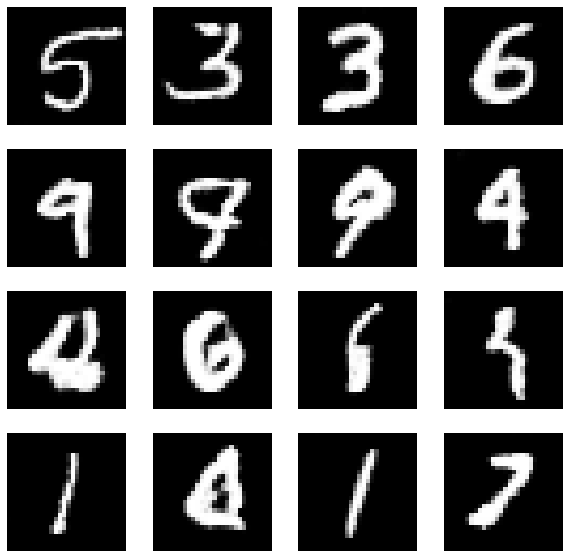

Epoch: 80: 100%|██████████| 235/235 [00:45<00:00,  5.14Batch/s, gen_loss=1.77, disc_loss=0.725]


saving a checkpoint at epoch 80


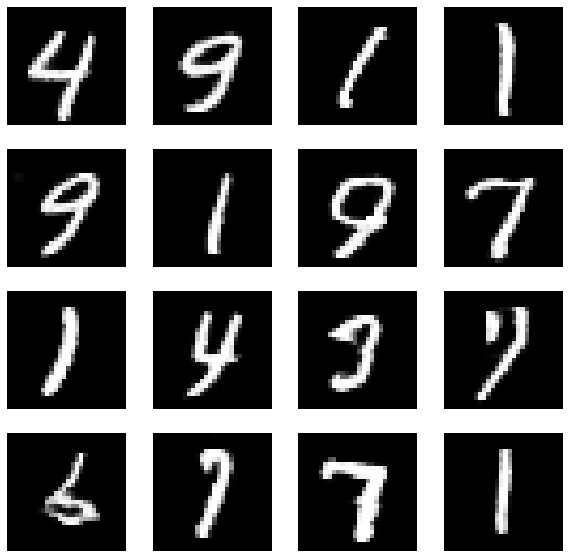

Epoch: 81: 100%|██████████| 235/235 [00:46<00:00,  5.11Batch/s, gen_loss=1.76, disc_loss=0.718]


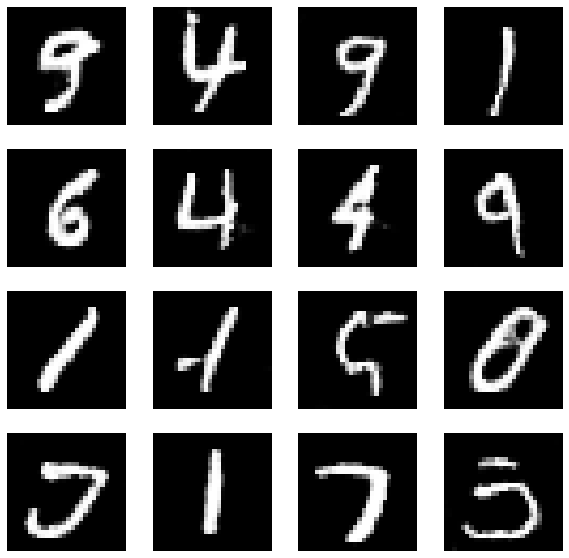

Epoch: 82: 100%|██████████| 235/235 [00:45<00:00,  5.12Batch/s, gen_loss=1.78, disc_loss=0.723]


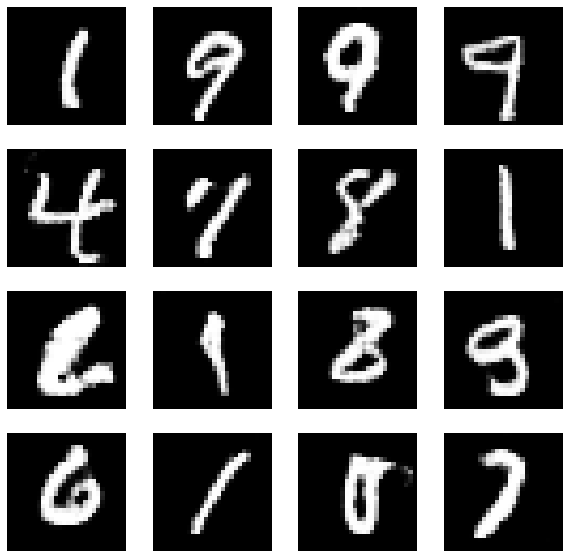

Epoch: 83: 100%|██████████| 235/235 [00:46<00:00,  5.08Batch/s, gen_loss=1.77, disc_loss=0.716]


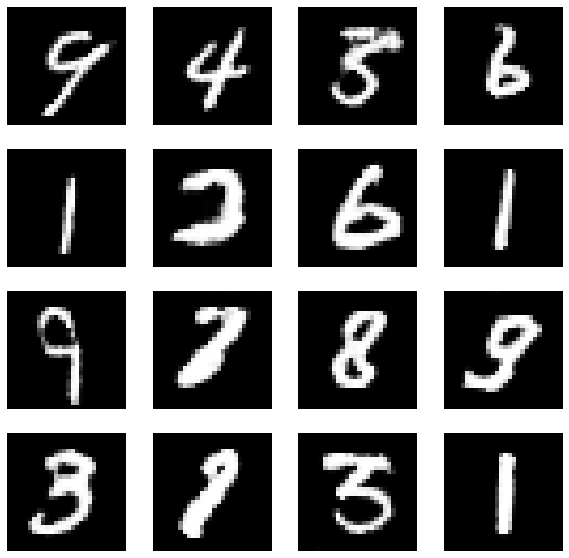

Epoch: 84: 100%|██████████| 235/235 [00:45<00:00,  5.14Batch/s, gen_loss=1.78, disc_loss=0.717]


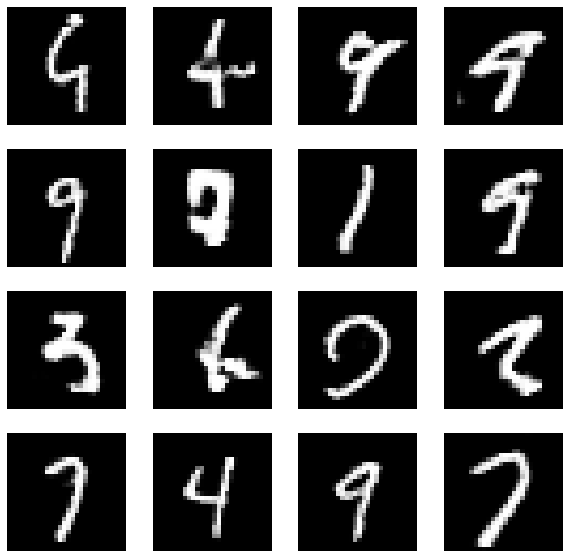

Epoch: 85: 100%|██████████| 235/235 [00:46<00:00,  5.09Batch/s, gen_loss=1.79, disc_loss=0.717]


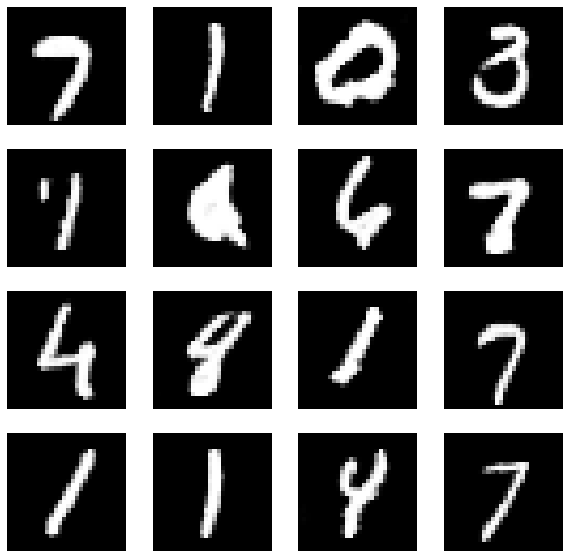

Epoch: 86: 100%|██████████| 235/235 [00:45<00:00,  5.11Batch/s, gen_loss=1.8, disc_loss=0.715]


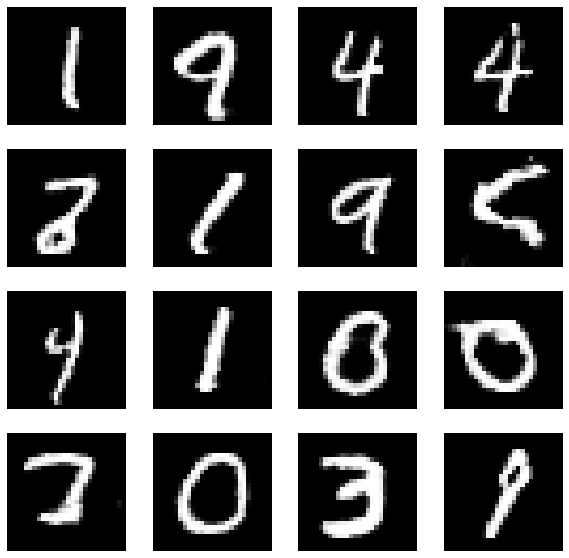

Epoch: 87: 100%|██████████| 235/235 [00:46<00:00,  5.08Batch/s, gen_loss=1.8, disc_loss=0.715]


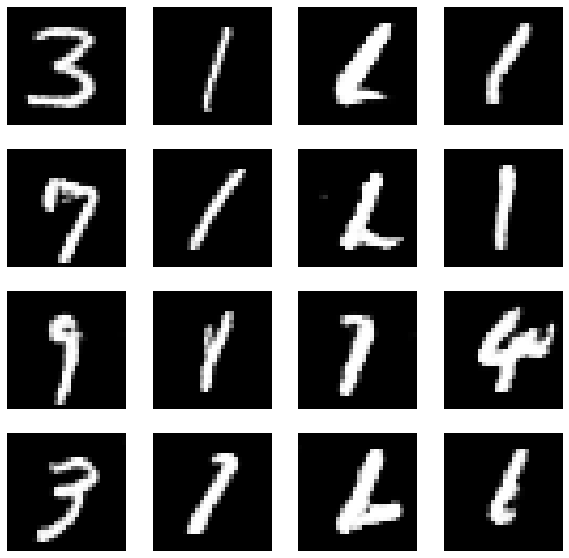

Epoch: 88: 100%|██████████| 235/235 [00:46<00:00,  5.08Batch/s, gen_loss=1.8, disc_loss=0.716]


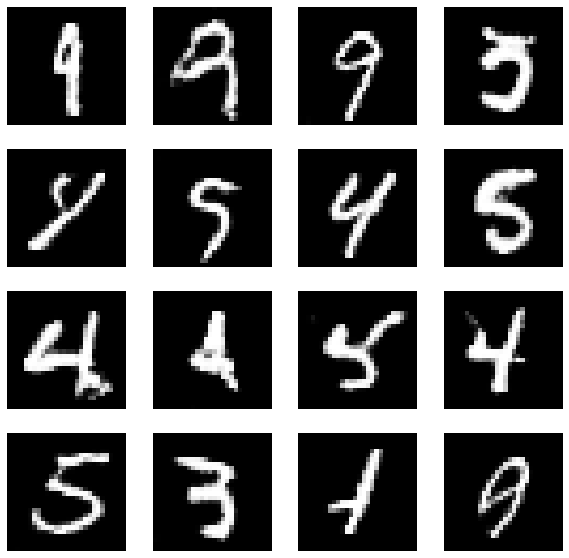

Epoch: 89: 100%|██████████| 235/235 [00:46<00:00,  5.11Batch/s, gen_loss=1.8, disc_loss=0.715]


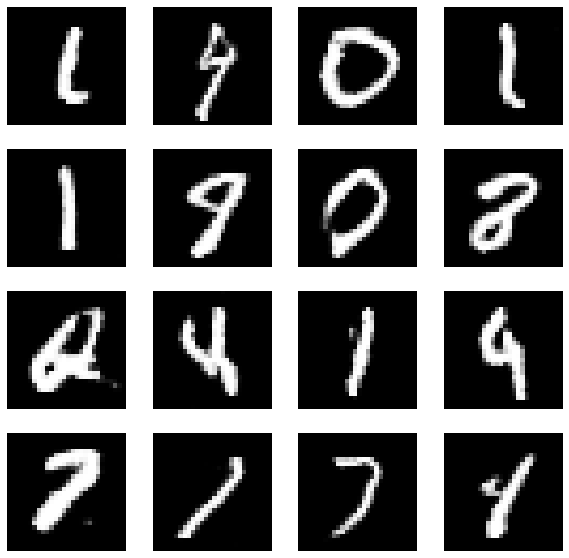

Epoch: 90: 100%|██████████| 235/235 [00:46<00:00,  5.05Batch/s, gen_loss=1.8, disc_loss=0.707]


saving a checkpoint at epoch 90


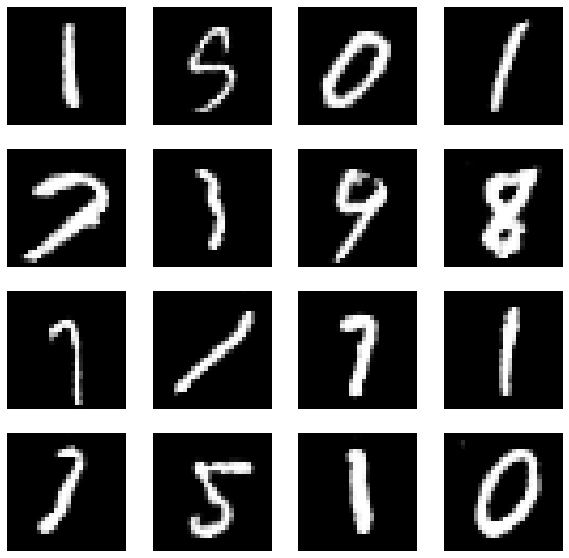

Epoch: 91: 100%|██████████| 235/235 [00:46<00:00,  5.08Batch/s, gen_loss=1.81, disc_loss=0.712]


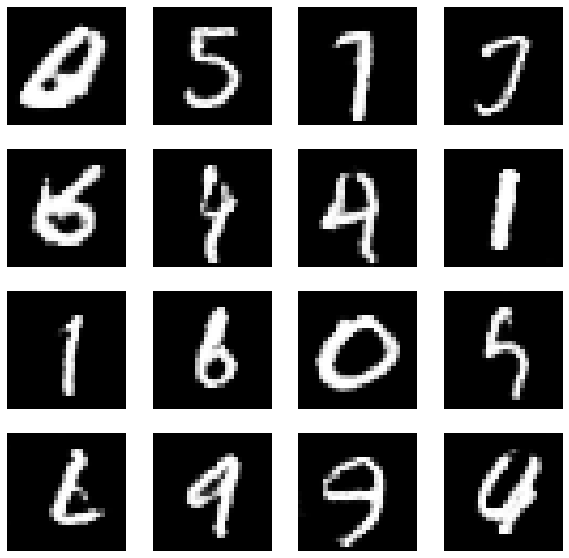

Epoch: 92: 100%|██████████| 235/235 [00:46<00:00,  5.05Batch/s, gen_loss=1.8, disc_loss=0.713]


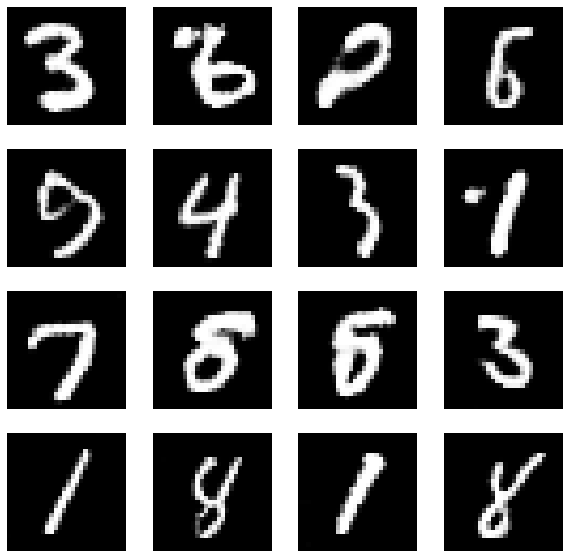

Epoch: 93: 100%|██████████| 235/235 [00:46<00:00,  5.08Batch/s, gen_loss=1.81, disc_loss=0.711]


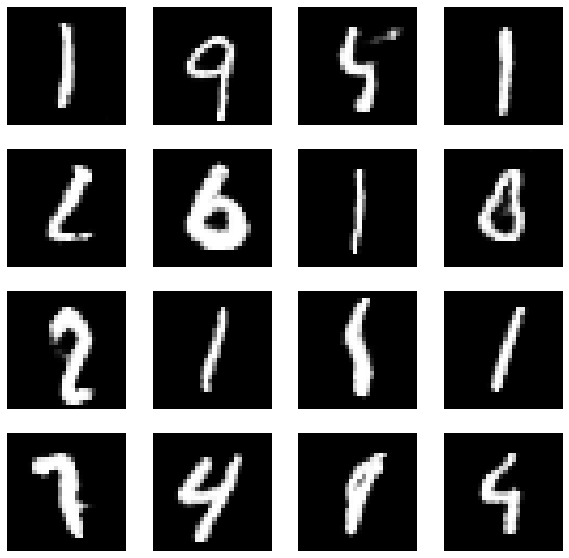

Epoch: 94: 100%|██████████| 235/235 [00:46<00:00,  5.07Batch/s, gen_loss=1.82, disc_loss=0.704]


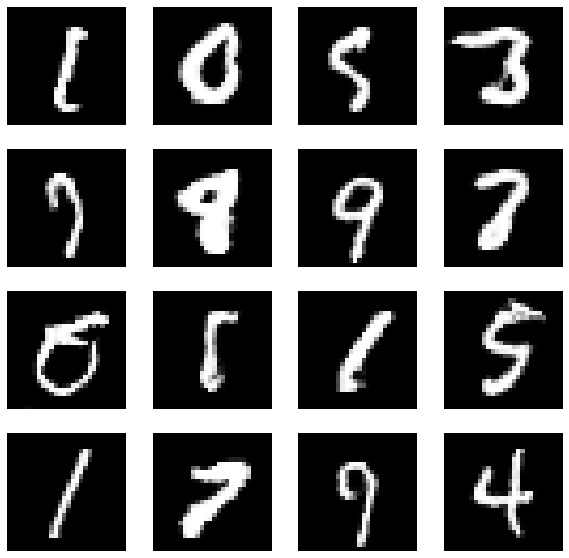

Epoch: 95: 100%|██████████| 235/235 [00:46<00:00,  5.03Batch/s, gen_loss=1.82, disc_loss=0.708]


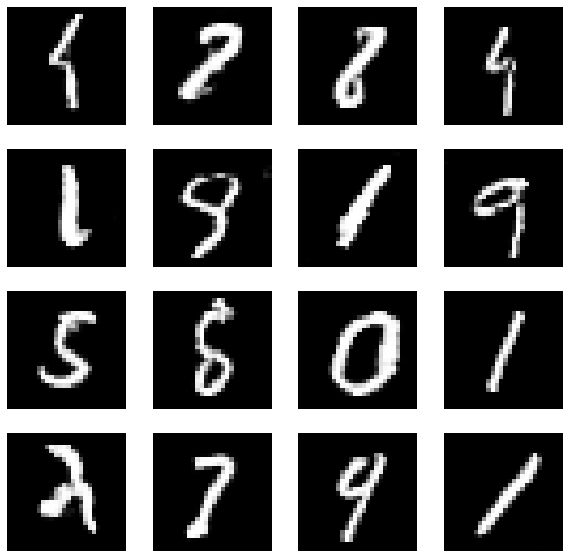

Epoch: 96: 100%|██████████| 235/235 [00:46<00:00,  5.07Batch/s, gen_loss=1.82, disc_loss=0.709]


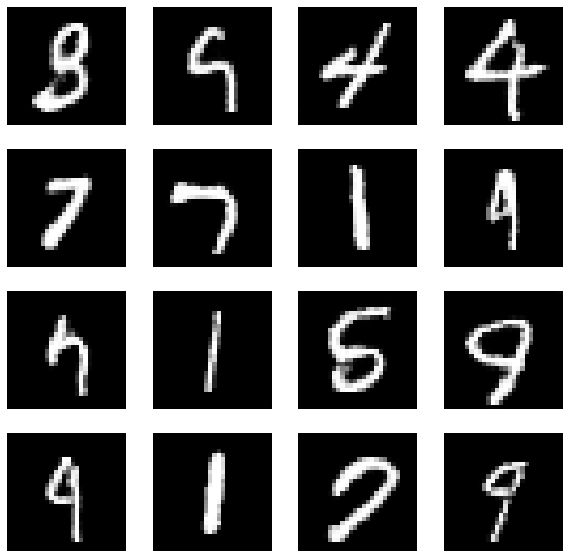

Epoch: 97: 100%|██████████| 235/235 [00:46<00:00,  5.03Batch/s, gen_loss=1.82, disc_loss=0.712]


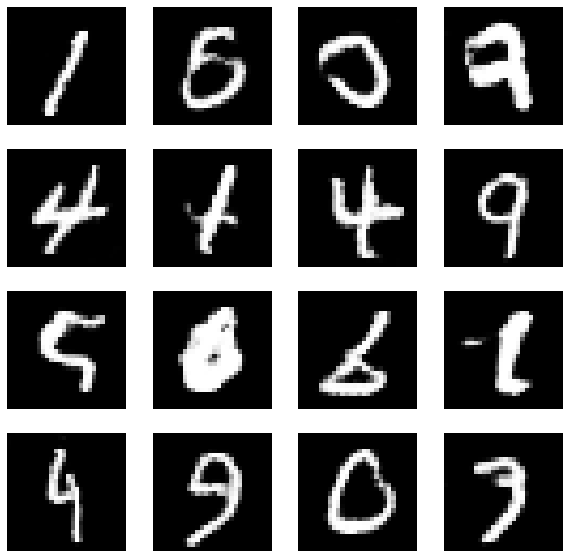

Epoch: 98: 100%|██████████| 235/235 [00:46<00:00,  5.01Batch/s, gen_loss=1.82, disc_loss=0.707]


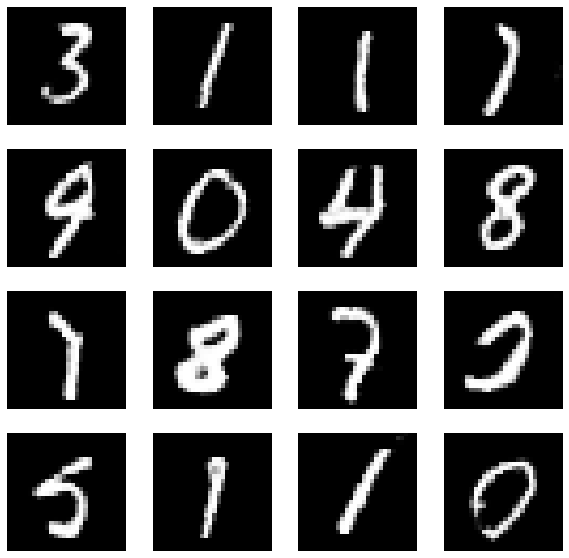

Epoch: 99: 100%|██████████| 235/235 [00:46<00:00,  5.07Batch/s, gen_loss=1.82, disc_loss=0.708]


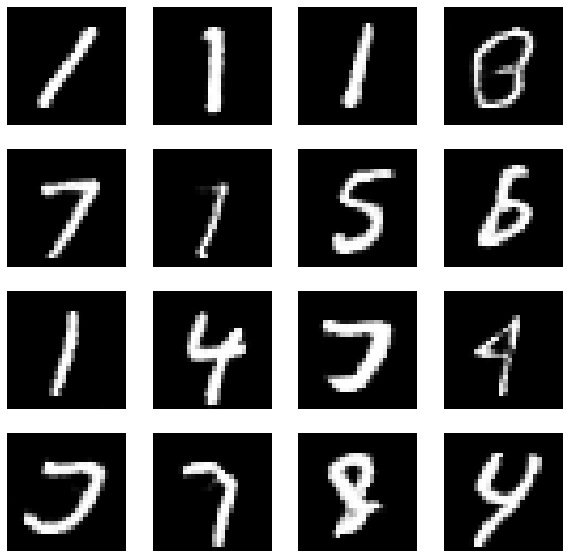

Epoch: 100: 100%|██████████| 235/235 [00:46<00:00,  5.04Batch/s, gen_loss=1.83, disc_loss=0.71]


saving a checkpoint at epoch 100


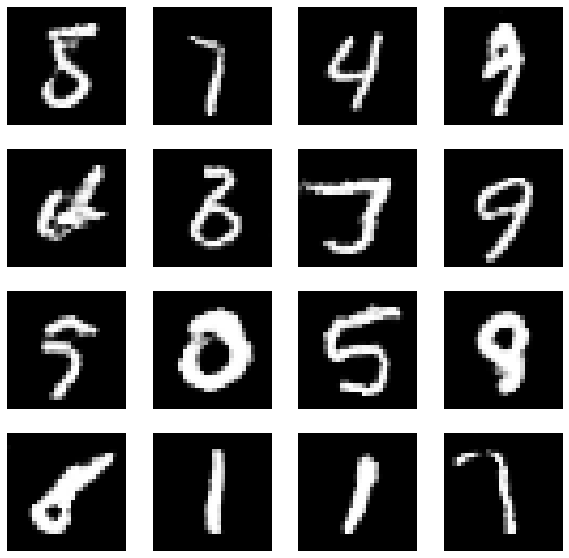

In [ ]:
for epoch in range(1, 101):
  avg_disc_loss = avg_gen_loss = 0
  
  discriminator.train()
  generator.train()
  with tqdm(dataloader, unit='Batch', total=len(dataloader)) as pbar:
    for i, (features, _) in enumerate(dataloader):
      pbar.set_description(f'Epoch: {epoch}')
      #Train discriminator with real images
      d_real_output = discriminator(features.cuda(0))
      real_labels = torch.ones(size=d_real_output.shape).cuda(0)

      disc_loss_real = criterion(d_real_output, real_labels)

      #Train discriminator with fake images
      g_output = generator(features.shape[0])
      d_fake_output = discriminator(g_output)
      fake_labels = torch.zeros(size=d_real_output.shape).cuda(0)
      
      disc_loss_fake = criterion(d_fake_output, fake_labels)

      #Training discriminator:
      disc_loss = disc_loss_fake + disc_loss_real #dicriminator loss will be the sum of this two losses

      discriminator_optimizer.zero_grad()
      generator_optimizer.zero_grad()
      
      disc_loss.backward(retain_graph=True)
      discriminator_optimizer.step()

      avg_disc_loss += disc_loss.item()

      #Training generator with different output that train discriminator fake images
      g_output = generator(features.shape[0])
      d_fake_output = discriminator(g_output)

      gen_loss = criterion(d_fake_output, real_labels)

      discriminator_optimizer.zero_grad()
      generator_optimizer.zero_grad()

      gen_loss.backward(retain_graph=True)
      generator_optimizer.step()

      avg_gen_loss += gen_loss.item()

      pbar.set_postfix({'gen_loss': avg_gen_loss/(i+1), 'disc_loss' :avg_disc_loss/(i+1)})
      pbar.update(1)

  avg_gen_loss/=(i+1)
  avg_disc_loss/=(i+1)

  gen_losses.append(avg_gen_loss)
  disc_losses.append(avg_disc_loss)

  if epoch%10==0 or epoch==1:
    print(f'saving a checkpoint at epoch {epoch}')
    torch.save({'state_dict': generator.state_dict()}, os.path.join(save_dir,'generator.pth'))
    torch.save({'state_dict': discriminator.state_dict()}, os.path.join(save_dir,'discriminator.pth'))
  generator.eval()
  generator.generate_img()

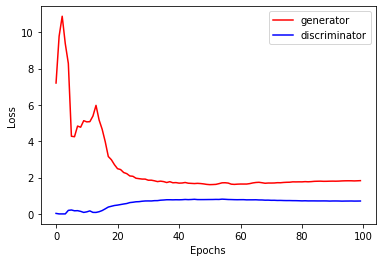

In [ ]:
plt.plot(gen_losses, c='r', label='generator')
plt.plot(disc_losses, c='b', label='discriminator')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()